## Explanatory Analysis of the Earthquakes in Turkey *by Nilay ÇİÇEKLİ*

### Problem
Earthquake is a quite up to date problem of ours. The earthquakes might effect our lives badly, and unfortunately they are unpredictable. Although we cannot make a certain know about when or where it will occur, we can have predictions according to some parameters. One and greates of these parameters is fault lines as one can guess of course. 
In this project, my goal is to investigate if there is any correlation between weather status and earthquakes. There is a theory that some weather conditions might trigger an earthquake[1], yet they are only short-term effects and that is only for big earthquakes. Turkey does not have such earthquakes, but still I wanted to observe if there is any trace of this theory in Turkey.
### Data
- Kandilli Observation Center Data, Earthquakes in Turkey in 2000-2020(not included). I generated it by using the center's website [2]. The data involves earthquakes with magnitude from 2 to 9. Because of the software limits, I had to get several txt files then merge them here in code afterwards. I also added some columns while solving the problems when needed like region and season. Initial data columns:
ID: the value I assigned, shows event sequence.
Code: Unique ID for event [YYYYMMDDHHMMSS (YearMonthDayHourMinuteSecond)].
Date: Date of event specified in the following format YYYY.MM.DD (Year.Month.Day).
Time: Origin time of event (UTC) specified in the following format HH:MM:SS.MS (Hour:Minute:Second.Millisecond).
Latitude, Longtitude: Coordinations of the occasion. (in decimal degrees)
Depth(km): Depth of the event in kilometers. the earthquakes with a depth smaller than 300km is considered 'close'.
xM: Biggest magnitude value in specified magnitude values (MD, ML, Mw, Ms and Mb).[3]
MD ML Mw Ms Mb: Magnitude types (MD: Duration, ML: Local, Mw: Moment, Ms: Surface wave, Mb: Body-wave). 
Type: Earthquake (Ke) or Suspected Explosion (Sm).

- Weather Data of Turkey in 2000-2020, generated by NASA's climate DB tool[4]. Columns are:
JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC: month names
ANN: annual value
LAT: latitude
LON: longitude
PARAMETER: variables such as temperature. More detailed explanation is given about this in the code.

### Questions, Hypothesis
- My main hypothesis is that there is a correlation between weather and earthquake. Beside this I am analyzing the followings:
- Which region of Turkey has the highest numbers of Earthquakes?
- Is there an 'earthquake' season?
- How does the number of earthquake occurence change over the years? Both in general, and on yearly basis.
- How is the distribution of shallow and intermediate earthquakes?
- How is Marmara Region's and Istanbul's situation in particular?
- Drawing Turkey's earthquake map (faultline map) by using the data.
- Weather condiitons in the past 20 years in Marmara? (min and max temp, precipitation level, wind speed,humidity)
- Does weather pattern look like earthquake pattern in Marmara?
- Finally, can we predict the daily average number of earthquakes on a monthly basis for the upcoming months in Istanbul?

### Results
There are explanations in code after every analysis, but in short,
- There seems to be no correlation between weather and earthquake.
- Earthquakes do not have an observable pattern.
- And I was not very successful to predict future earthquakes.
- But I drew Turkey's fault line map successfully, and I made useful analysis about earthquakes in Turkey in general, also analysis that are region based, plus I observed Istanbul closely.

[1] https://www.theguardian.com/world/2016/oct/16/climate-change-triggers-earthquakes-tsunamis-volcanoes

[2] http://www.koeri.boun.edu.tr/sismo/zeqdb/

[3] http://www.koeri.boun.edu.tr/bilgi/buyukluk.htm

[4] https://power.larc.nasa.gov/data-access-viewer/

In [1]:
#first dataset I am using is earthquake data in Turkey for years 2000-2020 and where magnitude is in between 2 and 9.
 #this data is gotten bogazici university kandilli observation center.
 #website reference: http://www.koeri.boun.edu.tr/sismo/zeqdb/
 #website only generates up t0 50.000 data, but the data I want is way more than that, so I divided time interval into a few,
    #and I will merge them.

In [2]:
import numpy as np
import pandas as pd

In [3]:
earthquake = pd.read_csv('earthquake.txt', delimiter = "\t", encoding='mbcs', header=0,
                         names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
#earthquake

In [4]:
#earthquake[earthquake['Location'].str.contains("ISTANBUL")]

In [5]:
#Earthquake data, its encoding is not UTF-8, it is ANSI. So I declare encoding='mbcs'.
    #my reference: https://docs.python.org/2.4/lib/standard-encodings.html
    #because headers are turkish in the original file, I add new headers.
#reading all five seperate data. concating them. then dropping ID. because IDs do not contiunosly increase, in each table
 #it starts from zero. I will update it.
 #finally I print the dataset.

df1 = pd.read_csv('2000-2007.txt', delimiter = "\t", encoding='mbcs', header=0,names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
df2 = pd.read_csv('2007-2010.txt', delimiter = "\t", encoding='mbcs', header=0,names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
df3 = pd.read_csv('2010-2013.txt', delimiter = "\t", encoding='mbcs', header=0,names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
df4 = pd.read_csv('2013-2015.txt', delimiter = "\t", encoding='mbcs', header=0,names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
df5 = pd.read_csv('2015-2020.txt', delimiter = "\t", encoding='mbcs', header=0,names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"])
frames = [df1,df2,df3,df4,df5]
data = pd.concat(frames, names=["ID","Code","Date","Time","Latitude","Longtitude","Depth(KM)","xM","MD","ML","Mw","Ms","Mb","Type","Location"] )
data = data.drop(['ID'], axis=1)
data.insert(0, 'ID', range(1, 1 + len(data)))
data

ID            Code        Date         Time  Latitude  Longtitude  \
0           1  20070101225652  2007.01.01  22:56:52.56   39.0950     29.5383   
1           2  20070101173108  2007.01.01  17:31:08.60   41.0678     34.3403   
2           3  20070101164425  2007.01.01  16:44:25.59   40.2313     29.3232   
3           4  20070101104921  2007.01.01  10:49:21.51   36.7965     33.7145   
4           5  20070101091754  2007.01.01  09:17:54.64   36.8147     33.6768   
...       ...             ...         ...          ...       ...         ...   
46299  159580  20150101093011  2015.01.01  09:30:11.98   38.3350     39.0410   
46300  159581  20150101072700  2015.01.01  07:27:00.96   36.3547     28.8493   
46301  159582  20150101045211  2015.01.01  04:52:11.93   38.9120     43.5203   
46302  159583  20150101042051  2015.01.01  04:20:51.91   39.4328     29.1060   
46303  159584  20150101012514  2015.01.01  01:25:14.95   37.9005     27.3347   

       Depth(KM)   xM   MD   ML  Mw   Ms   Mb Type  \
0            7.3  3.0  3.0  0.0 NaN  0.0  0.0   Ke   
1            8.2  3.0  3.0  0.0 NaN  0.0  0.0   Ke   
2           22.0  2.5  2.5  0.0 NaN  0.0  0.0   Ke   
3           14.9  3.0  3.0  0.0 NaN  0.0  0.0   Ke   
4           13.1  3.0  3.0  0.0 NaN  0.0  0.0   Ke   
...          ...  ...  ...  ...  ..  ...  ...  ...   
46299        8.7  2.4  0.0  2.4 NaN  0.0  0.0   Ke   
46300        8.0  2.7  0.0  2.7 NaN  0.0  0.0   Ke   
46301        5.6  2.0  0.0  2.0 NaN  0.0  0.0   Ke   
46302        9.9  2.3  0.0  2.3 NaN  0.0  0.0   Ke   
46303        5.6  2.5  0.0  2.5 NaN  0.0  0.0   Ke   

                                             Location  
0      YENIGUNEY-GEDIZ (KÜTAHYA) [North West  1.4 km]  
1          INCECAY-KARGI (ÇORUM) [North East  1.5 km]  
2                DUDAKLI-KESTEL (BURSA) [East 0.6 km]  
3             KICAKOY-SILIFKE (MERSIN) [North 8.8 km]  
4            BALLI-MUT (MERSIN) [South East  10.2 km]  
...                                               ...  
46299   ILINCAK-SIVRICE (ELAZIG) [South East  1.3 km]  
46300                                         AKDENIZ  
46301              COLPAN- (VAN) [North West  2.3 km]  
46302    ORENCIK-SIMAV (KUTAHYA) [South East  1.4 km]  
46303         SULTANIYE-SELCUK (IZMIR) [North 1.9 km]  

[159584 rows x 15 columns]

In [6]:
data.insert(3,"Year", data["Date"].str[0:4], True) #loc, column_name,value,repeating_val
#Due to observe the distributions over years, I add a new column year, which only represents Year of the event.

In [7]:
#here are the datatypes of columns
#what do these columns mean?
 #ID: the value I assigned, shows event sequence.
 #Code: Unic ID for event [YYYYMMDDHHMMSS (YearMonthDayHourMinuteSecond)].
 #Date: Date of event specified in the following format YYYY.MM.DD (Year.Month.Day).
 #Time: Origin time of event (UTC) specified in the following format HH:MM:SS.MS (Hour:Minute:Second.Millisecond).
 #Latitude, Longtitude: Coordinations of the occasion. (in decimal degrees)
 #Depth(km): Depth of the event in kilometers. the earthquakes with a depth smaller than 300km is considered 'close'.
 #xM: Biggest magnitude value in specified magnitude values (MD, ML, Mw, Ms and Mb).
 #MD ML Mw Ms Mb: Magnitude types (MD: Duration, ML: Local, Mw: Moment, Ms: Surface wave, Mb: Body-wave). 
    #0.0 (zero) means no calculation for that type of magnitude.
 #Type: Earthquake (Ke) or Suspected Explosion (Sm).
 
#for more information about magnitude types please check: http://www.koeri.boun.edu.tr/bilgi/buyukluk.htm
data.dtypes

ID              int32
Code            int64
Date           object
Year           object
Time           object
Latitude      float64
Longtitude    float64
Depth(KM)     float64
xM            float64
MD            float64
ML            float64
Mw            float64
Ms            float64
Mb            float64
Type           object
Location       object
dtype: object

In [8]:
#checking for correlation
data.corr()
#no correlation found. I would like to draw attention to that there is no correlation between depth and magnitude.

ID      Code  Latitude  Longtitude  Depth(KM)        xM  \
ID          1.000000  0.881559 -0.137894   -0.067324  -0.060574 -0.434355   
Code        0.881559  1.000000 -0.181269   -0.048231  -0.041165 -0.461830   
Latitude   -0.137894 -0.181269  1.000000    0.158397  -0.172903 -0.027947   
Longtitude -0.067324 -0.048231  0.158397    1.000000  -0.067068  0.095381   
Depth(KM)  -0.060574 -0.041165 -0.172903   -0.067068   1.000000  0.064078   
xM         -0.434355 -0.461830 -0.027947    0.095381   0.064078  1.000000   
MD         -0.736833 -0.806908  0.139738    0.037483   0.035013  0.474621   
ML          0.646612  0.716365 -0.166916   -0.004558  -0.012807 -0.136894   
Mw         -0.189930 -0.096408 -0.061543    0.020682   0.054617  0.814494   
Ms         -0.010377 -0.013805 -0.000256    0.001992   0.008096  0.047277   
Mb         -0.044644 -0.045091 -0.026356    0.032788   0.042988  0.230360   

                  MD        ML        Mw        Ms        Mb  
ID         -0.736833  0.646612 -0.189930 -0.010377 -0.044644  
Code       -0.806908  0.716365 -0.096408 -0.013805 -0.045091  
Latitude    0.139738 -0.166916 -0.061543 -0.000256 -0.026356  
Longtitude  0.037483 -0.004558  0.020682  0.001992  0.032788  
Depth(KM)   0.035013 -0.012807  0.054617  0.008096  0.042988  
xM          0.474621 -0.136894  0.814494  0.047277  0.230360  
MD          1.000000 -0.914821  0.100670  0.013408  0.000473  
ML         -0.914821  1.000000  0.782465  0.000099  0.093550  
Mw          0.100670  0.782465  1.000000  0.049292  0.098057  
Ms          0.013408  0.000099  0.049292  1.000000  0.051096  
Mb          0.000473  0.093550  0.098057  0.051096  1.000000

In [9]:
#sort by date
data = data.sort_values(by="Date")
data

ID            Code        Date  Year         Time  Latitude  \
29347   29348  20000101005508  2000.01.01  2000  00:55:08.30   37.9500   
29330   29331  20000101235656  2000.01.01  2000  23:56:56.60   40.8700   
29331   29332  20000101235045  2000.01.01  2000  23:50:45.30   39.1800   
29332   29333  20000101210849  2000.01.01  2000  21:08:49.10   40.7700   
29333   29334  20000101210736  2000.01.01  2000  21:07:36.80   40.7800   
...       ...             ...         ...   ...          ...       ...   
14     113295  20191231024157  2019.12.31  2019  02:41:57.82   40.7505   
15     113296  20191231023323  2019.12.31  2019  02:33:23.40   39.0687   
16     113297  20191231020212  2019.12.31  2019  02:02:12.07   37.0308   
8      113289  20191231091250  2019.12.31  2019  09:12:50.64   37.9652   
0      113281  20191231232319  2019.12.31  2019  23:23:19.83   37.9537   

       Longtitude  Depth(KM)   xM   MD   ML   Mw   Ms   Mb Type  \
29347     35.5400        0.0  3.3  3.3  0.0  NaN  0.0  0.0   Ke   
29330     30.8400        0.0  2.6  2.6  0.0  NaN  0.0  0.0   Ke   
29331     27.9900        6.0  3.0  3.0  0.0  NaN  0.0  0.0   Ke   
29332     30.8200        8.0  3.4  3.4  0.0  NaN  0.0  0.0   Ke   
29333     30.6200        5.0  2.6  2.6  0.0  NaN  0.0  0.0   Ke   
...           ...        ...  ...  ...  ...  ...  ...  ...  ...   
14        27.3865       13.8  2.0  0.0  2.0  0.0  0.0  0.0   Ke   
15        27.8587        8.3  2.0  0.0  2.0  0.0  0.0  0.0   Ke   
16        43.0322       30.1  2.2  0.0  2.2  0.0  0.0  0.0   Ke   
8         42.9640        1.5  2.3  0.0  2.3  0.0  0.0  0.0   Ke   
0         42.9645       10.9  2.2  0.0  2.2  0.0  0.0  0.0   Ke   

                                                Location  
29347  DELIALIUSAGI-YAHYALI (KAYSERI) [North East  0....  
29330     DEDEDUZU-GUMUSOVA (DUZCE) [South West  2.2 km]  
29331     AKKOCALI-AKHISAR (MANISA) [North East  0.9 km]  
29332   HARMANTEPE-HENDEK (SAKARYA) [North East  0.8 km]  
29333     YAGBASAN-HENDEK (SAKARYA) [North East  0.9 km]  
...                                                  ...  
14               GAZIKOY-SARKOY (TEKIRDAG) [East 4.7 km]  
15               SELCIKLI-AKHISAR (MANISA) [West 2.8 km]  
16                                                  IRAK  
8                 KACIT-CATAK (VAN) [North West  4.1 km]  
0                 KACIT-CATAK (VAN) [North West  3.1 km]  

[159584 rows x 16 columns]

In [10]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

The following graph shows number of the occurence of the earthquakes in the same day since 2000. 
The biggest number is over 500. To be exact:  505 and that is at:  2017.07.21 and not surprisingly there was several earthquakes greater than magnitude 4 that day. Few of them:  [4.9 4.6 4.6 4.5 4.4] and these are the locations: ['AKYARLAR-BODRUM (MUGLA) [South West  4.5 km]' 'GOKOVA KORFEZI (AKDENIZ)'
 'GOKOVA KORFEZI (AKDENIZ)' 'GOKOVA KORFEZI (AKDENIZ)'
 'GOKOVA KORFEZI (AKDENIZ)'] as seen, they are in the same area, so here conclusion is probably occurence of relatively big earthquakes triggers
a big series of consecutive earthquakes.


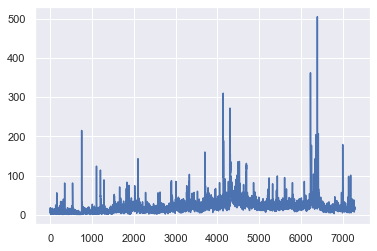

In [11]:
x = data.groupby("Date").Date.count()
print('''The following graph shows number of the occurence of the earthquakes in the same day since 2000. 
The biggest number is over 500. To be exact: ''',x.values.max(), '''and that is at: ''', x[x.values==x.values.max()].keys()[0],
'''and not surprisingly there was several earthquakes greater than magnitude 4 that day. Few of them: ''', 
data[data["Date"]==x[x.values==x.values.max()].keys()[0]].sort_values(by="xM",ascending=False).head().xM.values,
'''and these are the locations:''', 
data[data["Date"]==x[x.values==x.values.max()].keys()[0]].sort_values(by="xM",ascending=False).head().Location.values,
'''as seen, they are in the same area, so here conclusion is probably occurence of relatively big earthquakes triggers
a big series of consecutive earthquakes.''')

plt.plot(x.values)

In [12]:
print('''Previous analysis were all earthquakes combined, small and great. Next, i will investigate the situation for 
small and big ones seperately.''')
over = data[data.xM >= 5] #moderate & strong & major & great
over_count = Counter(over["Year"])

under = data[data.xM < 5] #light & minor & very minor
under_count = Counter(under["Year"])
#for more information about magnitude intervals of categories please check http://www.koeri.boun.edu.tr/sismo/bilgi/sss_tr.htm

Previous analysis were all earthquakes combined, small and great. Next, i will investigate the situation for 
small and big ones seperately.


As seen below, small earthquakes reach up to 16000 in a year while big ones are about 25 at most,and sometimes even
less than 5. That means, Turkey does not have much of strong earthquakes.


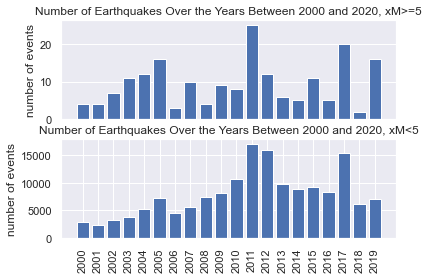

In [13]:
print('''As seen below, small earthquakes reach up to 16000 in a year while big ones are about 25 at most,and sometimes even
less than 5. That means, Turkey does not have much of strong earthquakes.''')

xxx = range(20)
#The below code will create two plots. The parameters that .subplot take are (row, column, no. of plots).
plt.subplot(2,1,1)
plt.bar(xxx,over_count.values())
plt.title("Number of Earthquakes Over the Years Between 2000 and 2020, xM>=5")
plt.ylabel('number of events')
plt.xticks([],[])

#The below code will create the second plot.
plt.subplot(2,1,2)
plt.bar(xxx,under_count.values())
plt.title("Number of Earthquakes Over the Years Between 2000 and 2020, xM<5")
plt.ylabel('number of events')
plt.xticks(xxx, under_count.keys(), rotation='vertical')
plt.show()

#reference for plotting bar chart in the same cell: https://www.weirdgeek.com/2018/11/plotting-multiple-bar-graph/

Following bar charts can be taught as one graph is put on top of the other one. On the rightend side number of events
for earthquakes with magnitude under 5 is shown and on the leftend side number of earthquakes with greater than 5 magnitude.
It seems like sometimes small size earthquakes gets the upper hand, sometimes great ones. That means, there is no conclusion
such as great magnitude earthquakes triggers small sized earthquakes, or vice versa. Both is possible, and there is
no pattern.
Note: Of course small sized earthquakes are always exceeds by far, but comparison here is according to ratio.


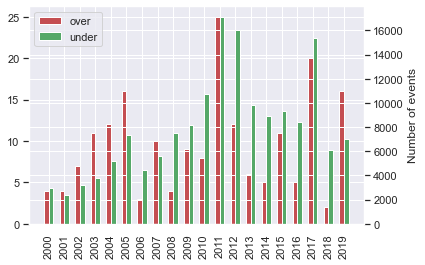

In [14]:
print('''Following bar charts can be taught as one graph is put on top of the other one. On the rightend side number of events
for earthquakes with magnitude under 5 is shown and on the leftend side number of earthquakes with greater than 5 magnitude.
It seems like sometimes small size earthquakes gets the upper hand, sometimes great ones. That means, there is no conclusion
such as great magnitude earthquakes triggers small sized earthquakes, or vice versa. Both is possible, and there is
no pattern.
Note: Of course small sized earthquakes are always exceeds by far, but comparison here is according to ratio.''')
xx = np.arange(20)
ax1 = plt.subplot(1,1,1)
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(xx + w /2, under_count.keys(), rotation='vertical')
ove =ax1.bar(xx, over_count.values(), width=w, color='r', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()

und =ax2.bar(xx + w,  under_count.values(), width=w,color='g',align='center')
#Set the Y axis label as GDP.
plt.ylabel('Number of events')
#To set the legend on the plot we have used plt.legend()
plt.legend([ove, und],['over', 'under'])
#To show the plot finally we have used plt.show().
plt.show()

#reference for multibar chart: https://www.weirdgeek.com/2018/11/plotting-multiple-bar-graph/

In [15]:
#My next goal is to classify each row under a region. First I need to make sure there is no NaN value under Location column.
print(data[data.Location.isna()==True])
#There is one and ID is 103498. I will change its value.
data["Location"].fillna("(Unknown)",inplace=True)
#now checking again and there is no nan anymore.
data.Location.isna().any()

          ID            Code        Date  Year         Time  Latitude  \
8968  103498  20131230193750  2013.12.30  2013  19:37:50.56    39.823   

      Longtitude  Depth(KM)   xM   MD   ML  Mw   Ms   Mb Type Location  
8968      38.636        5.0  2.9  0.0  2.9 NaN  0.0  0.0   Ke      NaN  


False

In [16]:
#First I found city list on the Internet
marmara = 'ISTANBUL|iSTANBUL|EDIRNE|EDiRNE|KIRKLARELI|KIRKLARELi|TEKIRDAG|TEKiRDAĞ|ÇANAKKALE|CANAKKALE|KOCAELI|KOCAELi|YALOVA|SAKARYA|BILECIK|BiLECiK|BURSA|BALIKESIR|BALIKESiR|MARMARA'
aegean = 'IZMIR|iZMiR|MANISA|MANiSA|AYDIN|DENIZLI|DENiZLi|MUGLA|MUĞLA|AFYONKARAHISAR|AFYONKARAHiSAR|USAK|UŞAK|KUTAHYA|KÜTAHYA|EGE'
central_anatolia = 'ESKISEHIR|ESKiSEHiR|KONYA|ANKARA|CANKIRI|ÇANKIRI|AKSARAY|KIRIKKALE|KIRSEHIR|KIRSEHiR|YOZGAT|NIGDE|NiGDE|NEVSEHIR|NEVSEHiR|KAYSERI|KAYSERi|KARAMAN|SIVAS|SiVAS'
mediterranean = 'ANTALYA|BURDUR|ISPARTA|MERSIN|MERSiN|ADANA|HATAY|OSMANIYE|OSMANiYE|KAHRAMANMARAS|KAHRAMANMARAŞ|AKDENIZ|AKDENiZ'
black_sea = 'BOLU|DUZCE|DÜZCE|ZONGULDAK|KARABUK|KARABÜK|BARTIN|KASTAMONU|CORUM|ÇORUM|SINOP|SiNOP|SAMSUN|AMASYA|TOKAT|ORDU|GIRESUN|GiRESUN|GUMUSHANE|GÜMÜŞHANE|TRABZON|BAYBURT|RIZE|RiZE|ARTVIN|ARTViN|KARADENIZ|KARADENiZ'
eastern_anatolia = 'MALATYA|ERZINCAN|ERZiNCAN|ELAZIG|ELAZIĞ|TUNCELI|TUNCELi|BINGOL|BiNGOL|ERZURUM|MUS|MUŞ|BITLIS|BiTLiS|KARS|AGRI|AĞRI|ARDAHAN|VAN|IGDIR|IĞDIR|HAKKARI|HAKKARi'
southeastern_anatolia = 'GAZIANTEP|GAZiANTEP|KILIS|KiLiS|ADIYAMAN|SANLIURFA|ŞANLIURFA|DIYARBAKIR|DiYARBAKIR|MARDIN|MARDiN|BATMAN|SIIRT|SiiRT|SIRNAK|ŞIRNAK'

#then created a check list for each of them
check_marmara = data['Location'].str.contains(marmara).values
check_aegean = data['Location'].str.contains(aegean).values
check_central_anatolia = data['Location'].str.contains(central_anatolia).values
check_mediterranean = data['Location'].str.contains(mediterranean).values
check_black_sea = data['Location'].str.contains(black_sea).values
check_eastern_anatolia = data['Location'].str.contains(eastern_anatolia).values
check_southeastern_anatolia = data['Location'].str.contains(southeastern_anatolia).values

In [17]:
#I classified each row and appended to a list.
l=list()
for mar,aeg,can,med,bla,easan,souan in zip(check_marmara,check_aegean,check_central_anatolia,check_mediterranean, check_black_sea, check_eastern_anatolia, check_southeastern_anatolia ):
    if mar==True:
        l.append("Marmara")
    elif (aeg==True): 
        l.append("Aegean")
    elif (can==True): 
        l.append("Central Anatolia")
    elif (med==True): 
        l.append("Mediterranean")
    elif (bla==True): 
        l.append("Black Sea")
    elif (easan==True): 
        l.append("Eastern Anatolia")
    elif (souan==True): 
        l.append("Southeastern Anatolia")
    else:
        l.append("Unknown")

In [18]:
#now it is time to add a new column called region into the data
data["Region"] = l

In [19]:
#data with new column
data

ID            Code        Date  Year         Time  Latitude  \
29347   29348  20000101005508  2000.01.01  2000  00:55:08.30   37.9500   
29330   29331  20000101235656  2000.01.01  2000  23:56:56.60   40.8700   
29331   29332  20000101235045  2000.01.01  2000  23:50:45.30   39.1800   
29332   29333  20000101210849  2000.01.01  2000  21:08:49.10   40.7700   
29333   29334  20000101210736  2000.01.01  2000  21:07:36.80   40.7800   
...       ...             ...         ...   ...          ...       ...   
14     113295  20191231024157  2019.12.31  2019  02:41:57.82   40.7505   
15     113296  20191231023323  2019.12.31  2019  02:33:23.40   39.0687   
16     113297  20191231020212  2019.12.31  2019  02:02:12.07   37.0308   
8      113289  20191231091250  2019.12.31  2019  09:12:50.64   37.9652   
0      113281  20191231232319  2019.12.31  2019  23:23:19.83   37.9537   

       Longtitude  Depth(KM)   xM   MD   ML   Mw   Ms   Mb Type  \
29347     35.5400        0.0  3.3  3.3  0.0  NaN  0.0  0.0   Ke   
29330     30.8400        0.0  2.6  2.6  0.0  NaN  0.0  0.0   Ke   
29331     27.9900        6.0  3.0  3.0  0.0  NaN  0.0  0.0   Ke   
29332     30.8200        8.0  3.4  3.4  0.0  NaN  0.0  0.0   Ke   
29333     30.6200        5.0  2.6  2.6  0.0  NaN  0.0  0.0   Ke   
...           ...        ...  ...  ...  ...  ...  ...  ...  ...   
14        27.3865       13.8  2.0  0.0  2.0  0.0  0.0  0.0   Ke   
15        27.8587        8.3  2.0  0.0  2.0  0.0  0.0  0.0   Ke   
16        43.0322       30.1  2.2  0.0  2.2  0.0  0.0  0.0   Ke   
8         42.9640        1.5  2.3  0.0  2.3  0.0  0.0  0.0   Ke   
0         42.9645       10.9  2.2  0.0  2.2  0.0  0.0  0.0   Ke   

                                                Location            Region  
29347  DELIALIUSAGI-YAHYALI (KAYSERI) [North East  0....  Central Anatolia  
29330     DEDEDUZU-GUMUSOVA (DUZCE) [South West  2.2 km]         Black Sea  
29331     AKKOCALI-AKHISAR (MANISA) [North East  0.9 km]            Aegean  
29332   HARMANTEPE-HENDEK (SAKARYA) [North East  0.8 km]           Marmara  
29333     YAGBASAN-HENDEK (SAKARYA) [North East  0.9 km]           Marmara  
...                                                  ...               ...  
14               GAZIKOY-SARKOY (TEKIRDAG) [East 4.7 km]           Marmara  
15               SELCIKLI-AKHISAR (MANISA) [West 2.8 km]            Aegean  
16                                                  IRAK           Unknown  
8                 KACIT-CATAK (VAN) [North West  4.1 km]  Eastern Anatolia  
0                 KACIT-CATAK (VAN) [North West  3.1 km]  Eastern Anatolia  

[159584 rows x 17 columns]

In [20]:
#now unknown region is less than 2000, all cities are classified. Unknowns are mostly borders.
len(data[data["Region"]=="Unknown"])

1952

In [21]:
#I will show the distribution of earthquakes grouped by regions of turkey.
print(data.groupby("Region").ID.count())
print('''
I will use these numbers to create a pie chart. Total data size: ''',len(data),
'''
Aegean: ''', 54658/len(data)*100,
'''
Black Sea: ''', 6795/len(data)*100,
'''
Central Anatolia: ''', 12879/len(data)*100,
'''
Eastern Anatolia: ''', 29476/len(data)*100,
'''
Marmara: ''', 21339/len(data)*100,
'''
Mediterranean: ''', 27904/len(data)*100,
'''
Southeastern  Anatolia: ''',4581/len(data)*100,
'''
Borders: ''', 1952/len(data)*100)

Region
Aegean                   54658
Black Sea                 6795
Central Anatolia         12879
Eastern Anatolia         29476
Marmara                  21339
Mediterranean            27904
Southeastern Anatolia     4581
Unknown                   1952
Name: ID, dtype: int64

I will use these numbers to create a pie chart. Total data size:  159584 
Aegean:  34.250300782033285 
Black Sea:  4.257945658712653 
Central Anatolia:  8.070357930619611 
Eastern Anatolia:  18.47052336073792 
Marmara:  13.371641267294967 
Mediterranean:  17.485462201724484 
Southeastern  Anatolia:  2.870588530178464 
Borders:  1.2231802686986164


Following pie chart shows the distribution of earthquakes over the regions for 20 years data.
And the result is Aegean region has the most frequent occurence of earthquake by far with a percentage 34% 
while southeastern anatolia has the least with 2.9% beside borders.


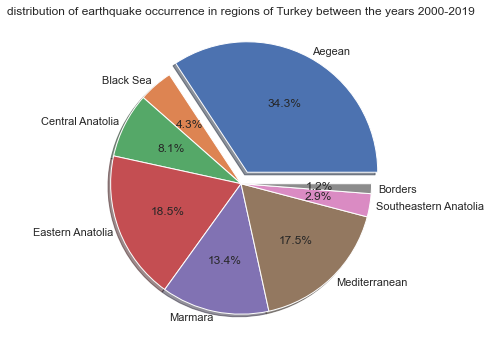

In [133]:
print('''Following pie chart shows the distribution of earthquakes over the regions for 20 years data.
And the result is Aegean region has the most frequent occurence of earthquake by far with a percentage 34% 
while southeastern anatolia has the least with 2.9% beside borders.''')
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Aegean', 'Black Sea', 'Central Anatolia', 'Eastern Anatolia','Marmara','Mediterranean','Southeastern Anatolia', 'Borders'
sizes = [34.25, 4.25, 8.07, 18.47,13.37,17.48,2.87,1.22]
explode = (0.1, 0, 0, 0,0,0,0,0)  # only "explode" the 1st slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, labeldistance=1.05)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title("distribution of earthquake occurrence in regions of Turkey between the years 2000-2020")
#fig = plt.figure(figsize=[10, 10])
#ax = fig.add_subplot(111)
#ax.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', labeldistance=1.05)
ax1.set_title("distribution of earthquake occurrence in regions of Turkey between the years 2000-2019");
plt.show()

#basic pie chart reference: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

In [134]:
#Next thing to do is to check whether these ratios differs over the years or not. For this purpose I create a method that
    #will create a pie chart automotically for the given year
marmara_perc = list() #refers to marmara percentage values over the years
aeg_perc = list() #aegean
can_perc = list() #central an.
bla_perc = list() #black sea
eas_perc = list() #eastern an.
med_perc = list() #mediterr.
sout_perc = list() #southes. an.
def pieChart(year): 
    #fig, axes= plt.subplots(3, 4)
    length = len(data[(data.Year)== year])
    d = data[(data.Year)== year].groupby("Region").ID.count()
    d_keys = d.keys()
    sizes = d[d_keys] / length *100
    labels = d_keys
    fig1, ax1 = plt.subplots( figsize=(10, 6))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, labeldistance=1.05)
    ax1.set_title(year);
#    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#    plt.title(year)
    plt.show()
    marmara_perc.append(d["Marmara"]/length*100)
    aeg_perc.append(d["Aegean"]/length*100)
    can_perc.append(d["Central Anatolia"]/length*100)
    bla_perc.append(d["Black Sea"]/length*100)
    eas_perc.append(d["Eastern Anatolia"]/length*100)
    med_perc.append(d["Mediterranean"]/length*100)
    sout_perc.append(d["Southeastern Anatolia"]/length*100)

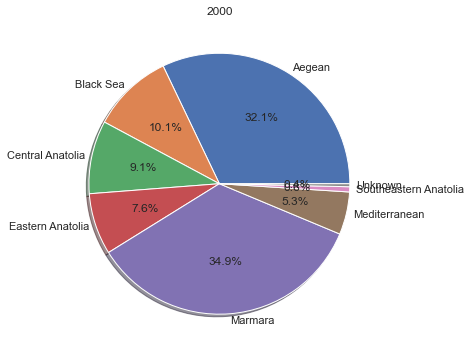

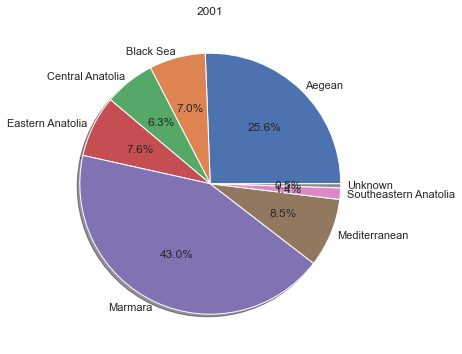

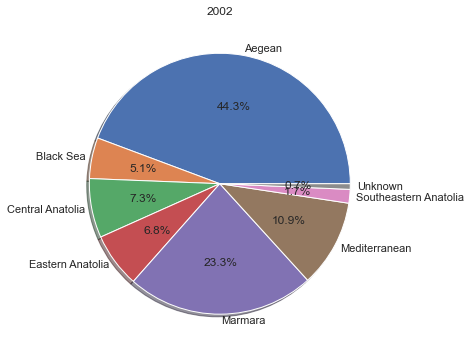

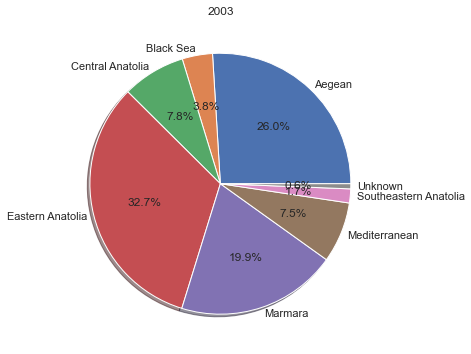

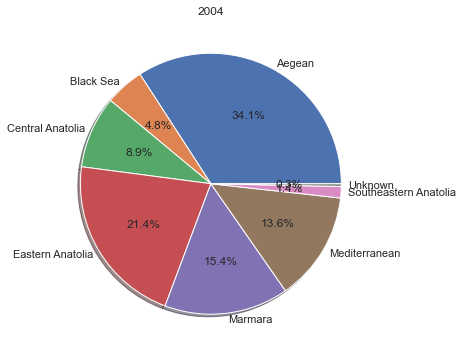

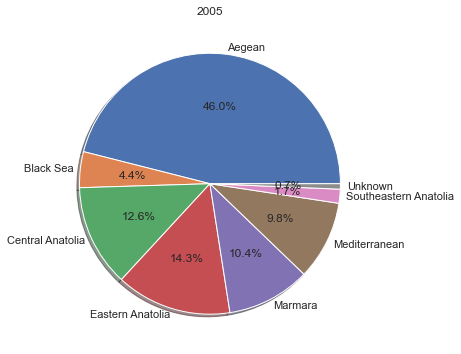

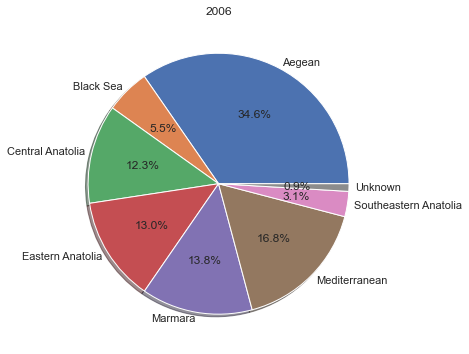

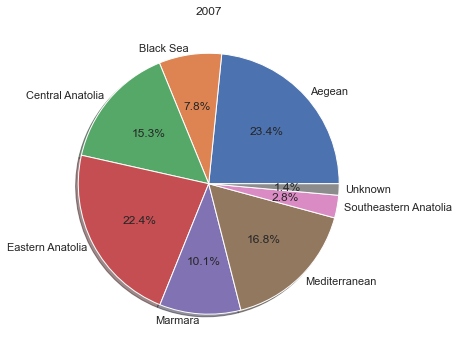

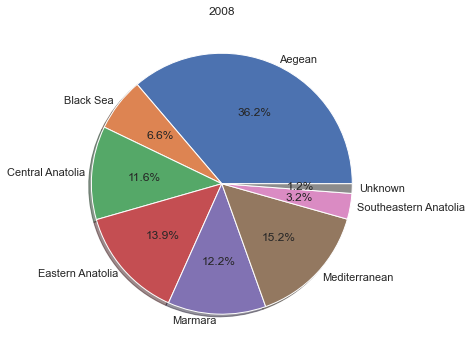

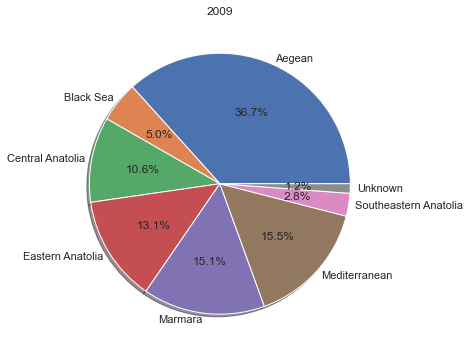

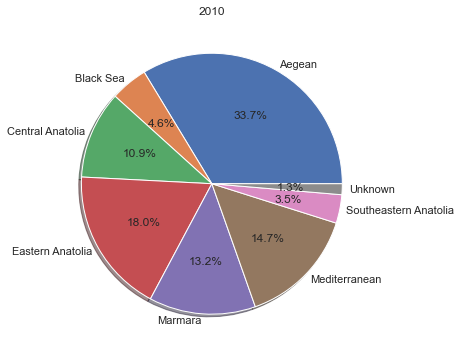

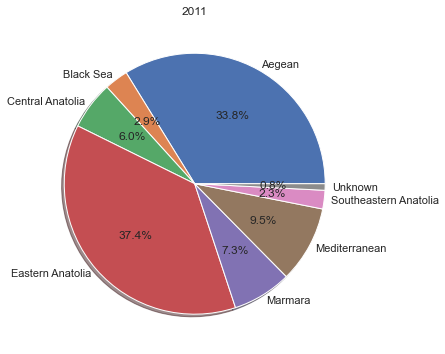

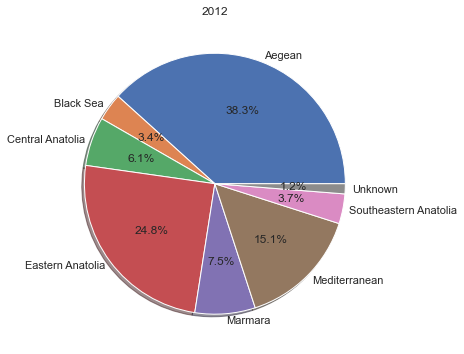

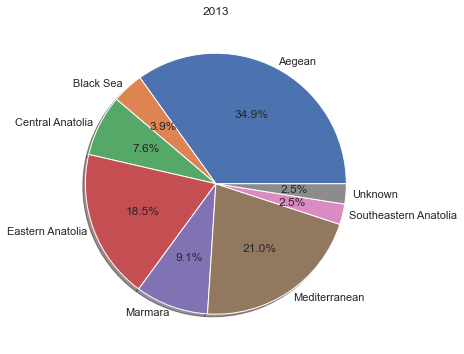

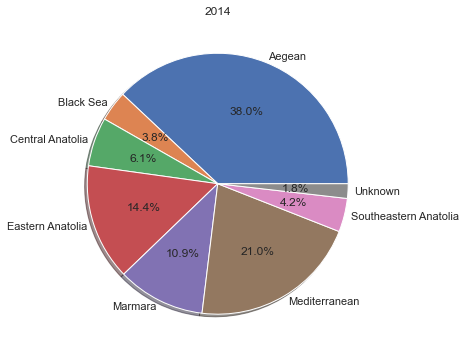

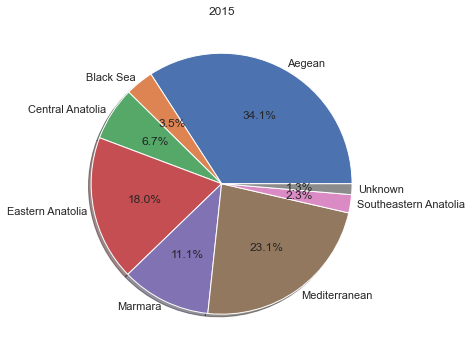

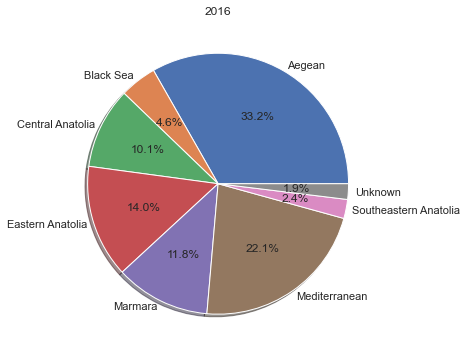

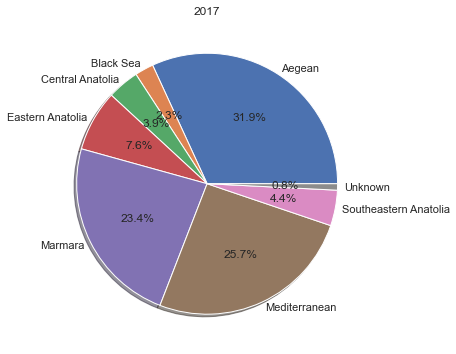

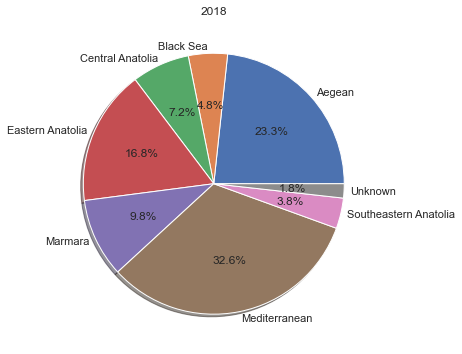

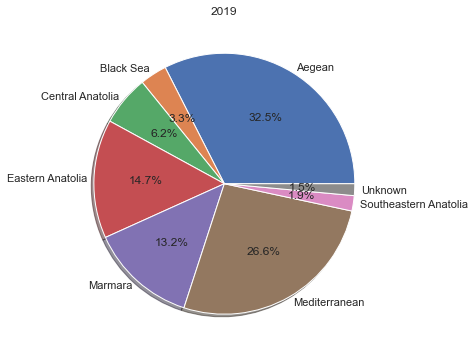

Over the years we observe that Aegean region generally dominates other regions, it reaches its peak in 2002 and 2005
with almost 50 percent, however there are times that marmara region increases unexpectedly, it does not have a stabile 
interval.
while it is 10%, in 2005 and 2007,  even 7 percent in 2011 and 2012, in 2001 it dominates even Aegean region by 43%
We can also abserve some changes in central anatolia.
In other regions there is not much of a change.


In [135]:
pieChart('2000')
pieChart('2001')
pieChart('2002')
pieChart('2003')
pieChart('2004')
pieChart('2005')
pieChart('2006')
pieChart('2007')
pieChart('2008')
pieChart('2009')
pieChart('2010')
pieChart('2011')
pieChart('2012')
pieChart('2013')
pieChart('2014')
pieChart('2015')
pieChart('2016')
pieChart('2017')
pieChart('2018')
pieChart('2019')

print('''Over the years we observe that Aegean region generally dominates other regions, it reaches its peak in 2002 and 2005
with almost 50 percent, however there are times that marmara region increases unexpectedly, it does not have a stabile 
interval.
while it is 10%, in 2005 and 2007,  even 7 percent in 2011 and 2012, in 2001 it dominates even Aegean region by 43%
We can also abserve some changes in central anatolia.
In other regions there is not much of a change.''')

In [25]:
marmara_perc

[34.86022229706972,
 43.03106633081445,
 23.28508495909377,
 19.88427143608627,
 15.390534821085033,
 10.3518821603928,
 13.76536312849162,
 10.067954220314736,
 12.154400961666889,
 15.126667482560274,
 13.204389064534128,
 7.329446064139941,
 7.467998751170778,
 9.055798353491209,
 10.881759030738165,
 11.08851546612437,
 11.773117254528122,
 23.424008310069468,
 9.766835154084461,
 13.2388377037562]

Text(0, 0.5, '(%)')

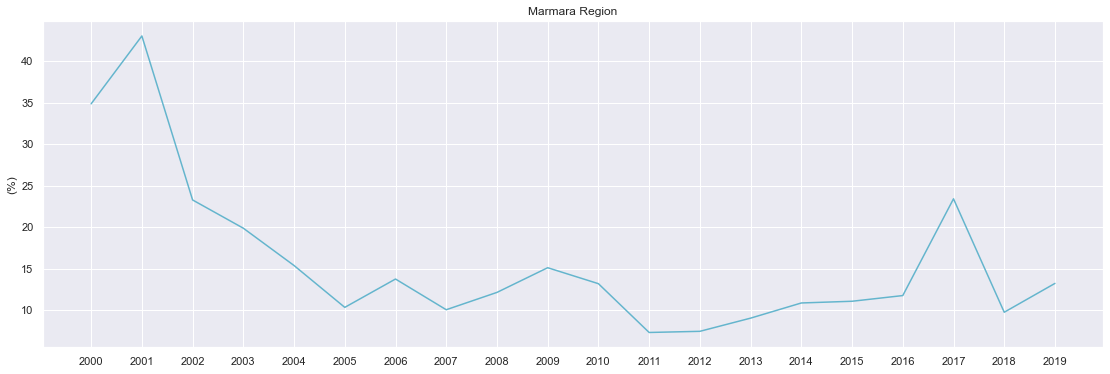

In [150]:
#due to observe the changes better over the years, I will draw graphs seperately for each region 
plt.plot(labels,marmara_perc,'c-')
plt.title("Marmara Region")
plt.ylabel("(%)")

Text(0, 0.5, '(%)')

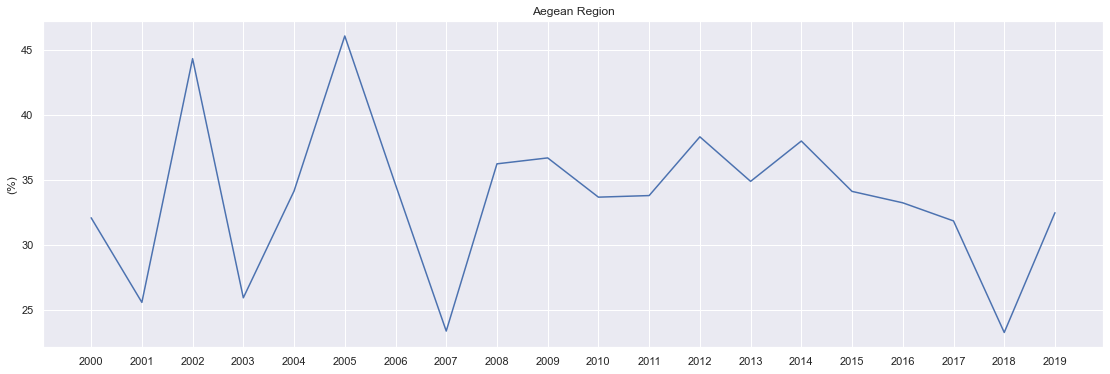

In [151]:
#Aegean region
plt.plot(labels,aeg_perc,'b-')
plt.title("Aegean Region")
plt.ylabel("(%)")

Text(0, 0.5, '(%)')

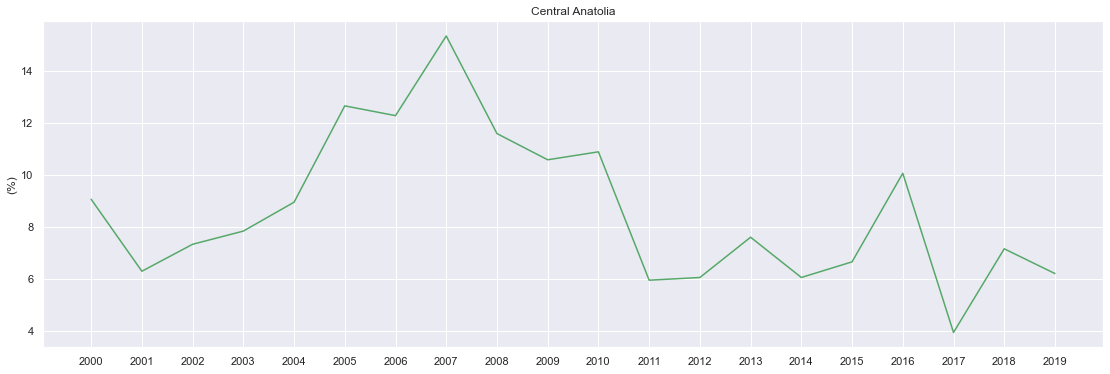

In [152]:
#Central Anatolia
plt.plot(labels,can_perc,'g')
plt.title("Central Anatolia")
plt.ylabel("(%)")

Text(0, 0.5, '(%)')

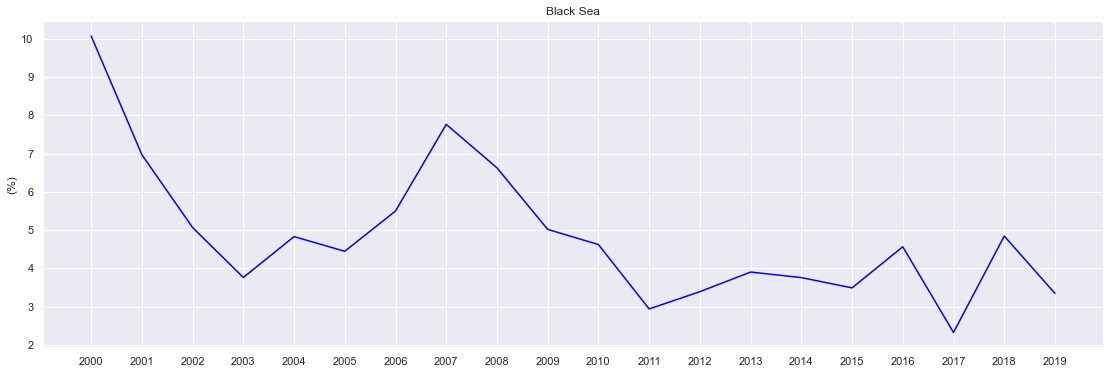

In [153]:
#Black Sea
plt.plot(labels,bla_perc,'blue')
plt.title("Black Sea")
plt.ylabel("(%)")

Text(0, 0.5, '(%)')

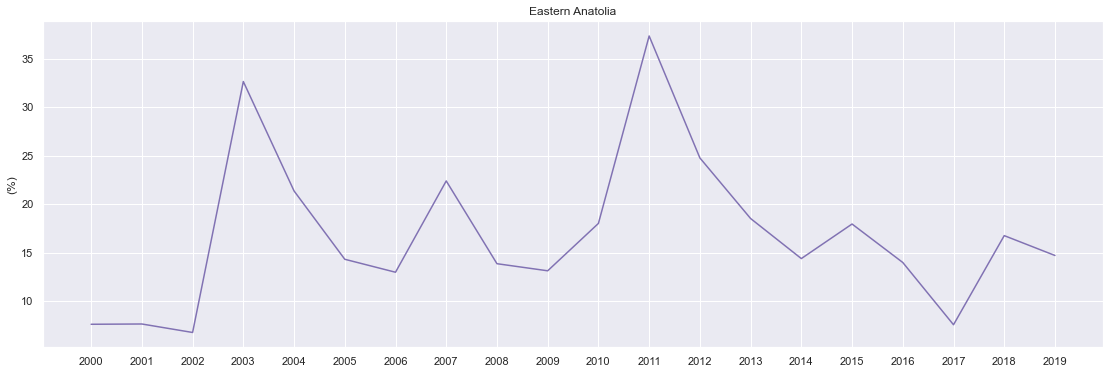

In [154]:
#Eastern Anatolia
plt.plot(labels,eas_perc,'m-')
plt.title("Eastern Anatolia")
plt.ylabel("(%)")

Text(0, 0.5, '(%)')

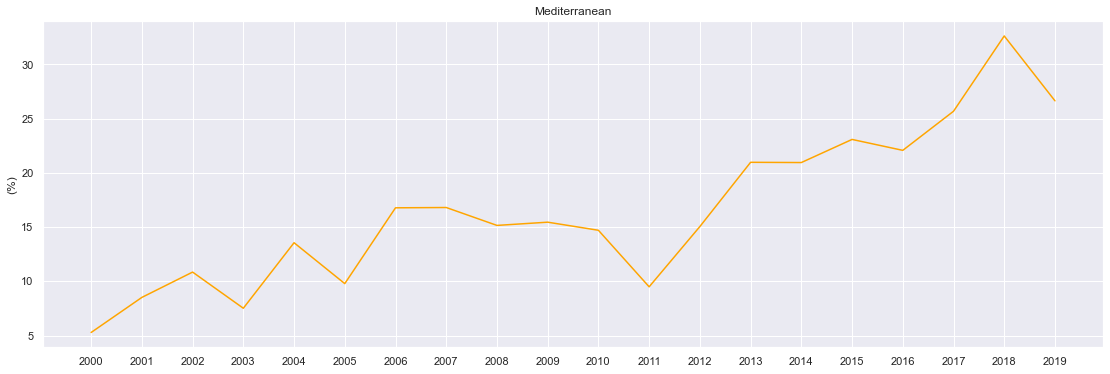

In [156]:
#Mediterranean
plt.plot(labels,med_perc,'orange')
plt.title("Mediterranean")
plt.ylabel("(%)")

Text(0, 0.5, '(%)')

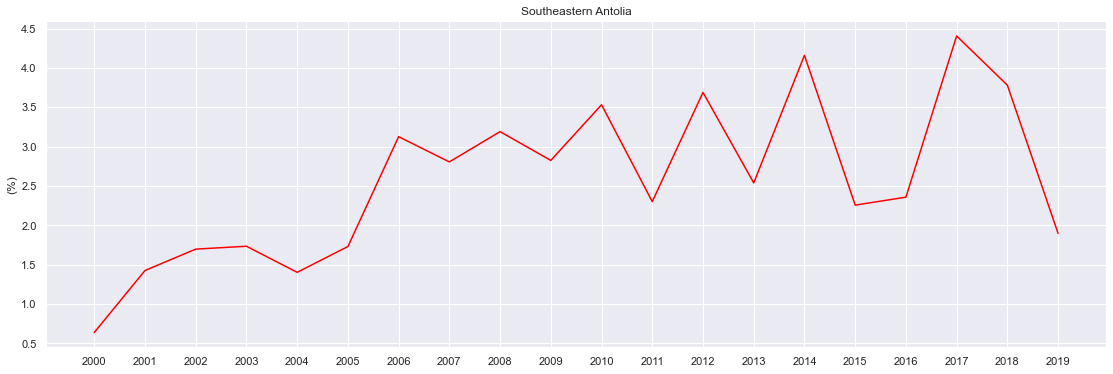

In [157]:
#Southeastern Antolia
plt.plot(labels,sout_perc,'red')
plt.title("Southeastern Antolia")
plt.ylabel("(%)")

In [33]:
data.insert(4,"Month", data["Date"].str[5:7], True) #loc, column_name,value,repeating_val

In [34]:
se = list()
for item in data["Date"].values:
    mo = item[5:7]
    if (mo=='01' or mo=='12' or mo=='02' ):
        se.append("Winter")
    elif (mo=='03' or mo=='04' or mo=='05' ):
        se.append("Spring")
    elif (mo=='06' or mo=='07' or mo=='08' ):
        se.append("Summer")
    elif (mo=='09' or mo=='10' or mo=='11' ):
        se.append("Autumn")

In [35]:
#create new column
data["Season"]= se

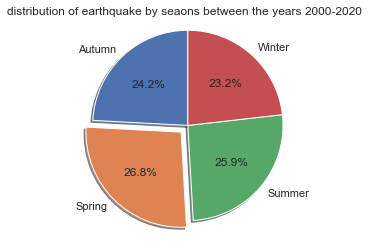

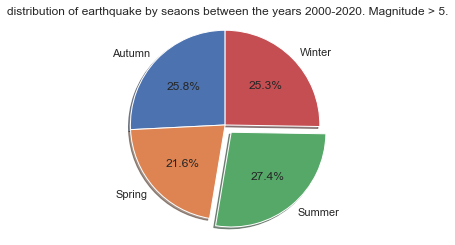

Conclusion is there is no specific 'earthquake season' 


In [36]:
season_dist = data.groupby("Season").ID.count()
explode=[0,0.1,0,0]
fig1, ax1 = plt.subplots()
ax1.pie(season_dist.values, explode=explode,labels=season_dist.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("distribution of earthquake by seaons between the years 2000-2020")
plt.show()

explode=[0,0,0.1,0]
fig1, ax1 = plt.subplots()
over = data[data.xM >= 5] 
season_dist_over = over.groupby("Season").ID.count()
ax1.pie(season_dist_over.values,explode=explode, labels=season_dist_over.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("distribution of earthquake by seaons between the years 2000-2020. Magnitude > 5.")
plt.show()

print("Conclusion is there is no specific 'earthquake season' ")

# 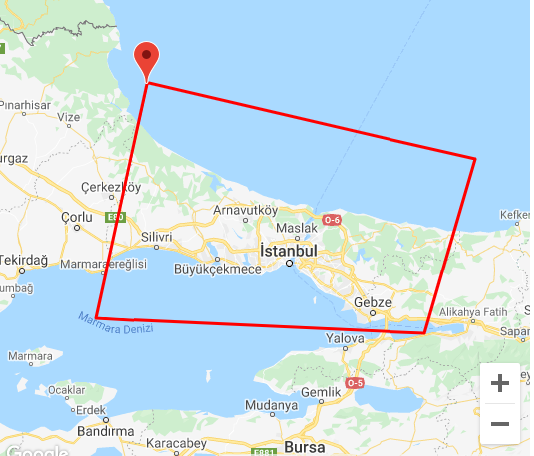
I marked a rough rectangle for Istanbul and got coordinates of the rectangle. Here are the coordinates of the corners(Lon,Lat):
- 28.195158,41.745879,0.0 (top-left)
- 27.915007,40.779682,0.0 (bottom-left)
- 29.716765,40.717260,0.0 (bottom-right)
- 29.996916,41.437758,0.0 (top-right)

By using these coordinates I will be drawing graphs about earthquakes in Istanbul.

*reference for tool: http://www.birdtheme.org/useful/v3tool.html

In [37]:
#earthquake[earthquake['Location'].str.contains("ISTANBUL")]
#data[(data.xM >= 3) & (data.xM < 9)] greater than magnitude 3

In [38]:
#I only could use this method to get the earthquakes in Istanbul, but this only gives the ones that are labeled as Istanbul
 #not around.
data[data['Location'].str.contains("ISTANBUL")]

ID            Code        Date  Year Month         Time  Latitude  \
29327   29328  20000102031438  2000.01.02  2000    01  03:14:38.60   40.8100   
29290   29291  20000106115848  2000.01.06  2000    01  11:58:48.30   40.9200   
29275   29276  20000107142716  2000.01.07  2000    01  14:27:16.30   40.8700   
29194   29195  20000118141820  2000.01.18  2000    01  14:18:20.50   41.5200   
29158   29159  20000123131158  2000.01.23  2000    01  13:11:58.80   40.8100   
...       ...             ...         ...   ...   ...          ...       ...   
700    113981  20191121025053  2019.11.21  2019    11  02:50:53.07   40.8802   
650    113931  20191124005441  2019.11.24  2019    11  00:54:41.14   40.8625   
627    113908  20191125121154  2019.11.25  2019    11  12:11:54.11   40.8723   
524    113805  20191130095235  2019.11.30  2019    11  09:52:35.86   40.8877   
198    113479  20191218131902  2019.12.18  2019    12  13:19:02.22   40.8572   

       Longtitude  Depth(KM)   xM   MD   ML   Mw   Ms   Mb Type  \
29327     29.1500        5.0  2.6  2.6  0.0  NaN  0.0  0.0   Ke   
29290     29.3100       10.0  2.6  2.6  0.0  NaN  0.0  0.0   Ke   
29275     28.4500       19.0  3.0  3.0  0.0  NaN  0.0  0.0   Ke   
29194     28.5000       14.0  3.2  3.2  0.0  NaN  0.0  0.0   Ke   
29158     29.0400        5.0  2.6  2.6  0.0  NaN  0.0  0.0   Ke   
...           ...        ...  ...  ...  ...  ...  ...  ...  ...   
700       28.2145       14.7  2.1  0.0  2.1  0.0  0.0  0.0   Ke   
650       28.2362        8.2  2.1  0.0  2.1  0.0  0.0  0.0   Ke   
627       28.2722        7.8  2.4  0.0  2.4  0.0  0.0  0.0   Ke   
524       28.4558       22.2  2.1  0.0  2.1  0.0  0.0  0.0   Ke   
198       28.2605       19.0  2.1  0.0  2.1  0.0  0.0  0.0   Ke   

                                           Location   Region  Season  
29327        ADALAR (ISTANBUL) [South East  7.4 km]  Marmara  Winter  
29290  KURNA-PENDIK (ISTANBUL) [South West  4.7 km]  Marmara  Winter  
29275   GÜRPINAR AÇIKLARI-ISTANBUL (MARMARA DENIZI)  Marmara  Winter  
29194         YALIKÖY AÇIKLARI-ISTANBUL (KARADENIZ)  Marmara  Winter  
29158       ADALAR (ISTANBUL) [South West  10.4 km]  Marmara  Winter  
...                                             ...      ...     ...  
700      SILIVRI ACIKLARI-ISTANBUL (MARMARA DENIZI)  Marmara  Autumn  
650      SILIVRI ACIKLARI-ISTANBUL (MARMARA DENIZI)  Marmara  Autumn  
627      SILIVRI ACIKLARI-ISTANBUL (MARMARA DENIZI)  Marmara  Autumn  
524     GURPINAR ACIKLARI-ISTANBUL (MARMARA DENIZI)  Marmara  Autumn  
198      SILIVRI ACIKLARI-ISTANBUL (MARMARA DENIZI)  Marmara  Winter  

[833 rows x 19 columns]

In [39]:
#I will solve the question as if it is a prefect rectangle. So top and bottom points'latitude values and left and right longtitude
 #will be considered aligned.
#As seen in the following data table result, this method gives us aearthquakes that are close to Istanbul like Marmara Sea,
 #in the previous method there were 833 results, now we got 2060 rows.
istanbul_earthq = data[(data.Latitude <= 41.6) & (data.Latitude >= 40.73) & (data.Longtitude <= 29.8) & (data.Longtitude >= 28.00) ]
istanbul_earthq

ID            Code        Date  Year Month         Time  Latitude  \
29339   29340  20000101074149  2000.01.01  2000    01  07:41:49.30   40.7600   
29324   29325  20000102133340  2000.01.02  2000    01  13:33:40.30   40.7300   
29327   29328  20000102031438  2000.01.02  2000    01  03:14:38.60   40.8100   
29290   29291  20000106115848  2000.01.06  2000    01  11:58:48.30   40.9200   
29275   29276  20000107142716  2000.01.07  2000    01  14:27:16.30   40.8700   
...       ...             ...         ...   ...   ...          ...       ...   
650    113931  20191124005441  2019.11.24  2019    11  00:54:41.14   40.8625   
627    113908  20191125121154  2019.11.25  2019    11  12:11:54.11   40.8723   
524    113805  20191130095235  2019.11.30  2019    11  09:52:35.86   40.8877   
414    113695  20191207021448  2019.12.07  2019    12  02:14:48.72   40.8333   
198    113479  20191218131902  2019.12.18  2019    12  13:19:02.22   40.8572   

       Longtitude  Depth(KM)   xM   MD   ML   Mw   Ms   Mb Type  \
29339     29.2300        7.0  3.3  3.3  0.0  NaN  0.0  0.0   Ke   
29324     29.6100       12.0  2.8  2.8  0.0  NaN  0.0  0.0   Ke   
29327     29.1500        5.0  2.6  2.6  0.0  NaN  0.0  0.0   Ke   
29290     29.3100       10.0  2.6  2.6  0.0  NaN  0.0  0.0   Ke   
29275     28.4500       19.0  3.0  3.0  0.0  NaN  0.0  0.0   Ke   
...           ...        ...  ...  ...  ...  ...  ...  ...  ...   
650       28.2362        8.2  2.1  0.0  2.1  0.0  0.0  0.0   Ke   
627       28.2722        7.8  2.4  0.0  2.4  0.0  0.0  0.0   Ke   
524       28.4558       22.2  2.1  0.0  2.1  0.0  0.0  0.0   Ke   
414       28.9477       11.8  2.1  0.0  2.1  0.0  0.0  0.0   Ke   
198       28.2605       19.0  2.1  0.0  2.1  0.0  0.0  0.0   Ke   

                                           Location   Region  Season  
29339              YALOVA AÇIKLARI (MARMARA DENIZI)  Marmara  Winter  
29324                IZMIT KÖRFEZI (MARMARA DENIZI)  Marmara  Winter  
29327        ADALAR (ISTANBUL) [South East  7.4 km]  Marmara  Winter  
29290  KURNA-PENDIK (ISTANBUL) [South West  4.7 km]  Marmara  Winter  
29275   GÜRPINAR AÇIKLARI-ISTANBUL (MARMARA DENIZI)  Marmara  Winter  
...                                             ...      ...     ...  
650      SILIVRI ACIKLARI-ISTANBUL (MARMARA DENIZI)  Marmara  Autumn  
627      SILIVRI ACIKLARI-ISTANBUL (MARMARA DENIZI)  Marmara  Autumn  
524     GURPINAR ACIKLARI-ISTANBUL (MARMARA DENIZI)  Marmara  Autumn  
414                                  MARMARA DENIZI  Marmara  Winter  
198      SILIVRI ACIKLARI-ISTANBUL (MARMARA DENIZI)  Marmara  Winter  

[2060 rows x 19 columns]

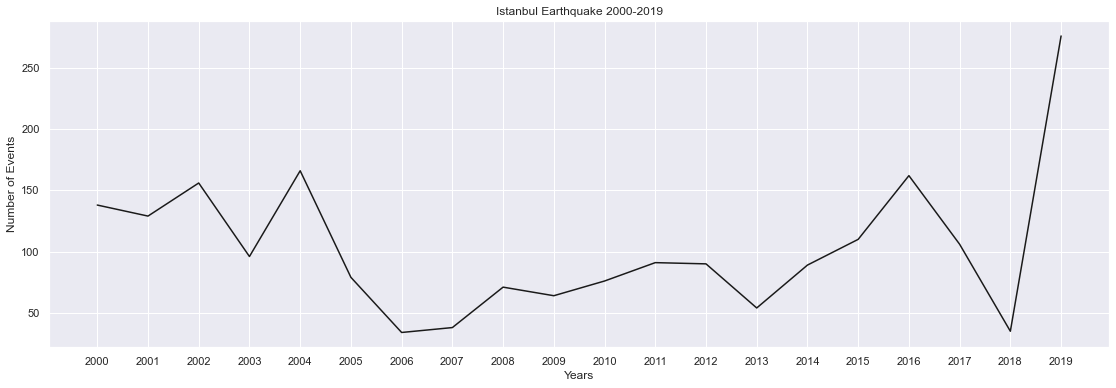

In [147]:
istanbulbyyear = istanbul_earthq.groupby("Year").ID.count().values
#labels= np.arange(2000,2020,1)
#labels = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
plt.plot(labels,istanbulbyyear,'k')
plt.xlabel("Years")
plt.ylabel("Number of Events")
plt.title("Istanbul Earthquake 2000-2019")
plt.show()

In [148]:
#I will write a generic method for that so if anyone wants to see the graph for any coordinate, he can do so
def distributionByCoordinate(lat_top,lat_bottom,lon_right,lon_left):
    result_table = data[(data.Latitude <= lat_top) & (data.Latitude >= lat_bottom) 
                        & (data.Longtitude <= lon_left) & (data.Longtitude >= lon_right)]
    plt.plot(labels,result_table.groupby("Year").ID.count().values,'r-')
    plt.xlabel("Years")
    plt.ylabel("Number of Events")
    plt.title("Earthquakes In Between Chosen Coordinates in 2000-2020")
    plt.show()
    return result_table

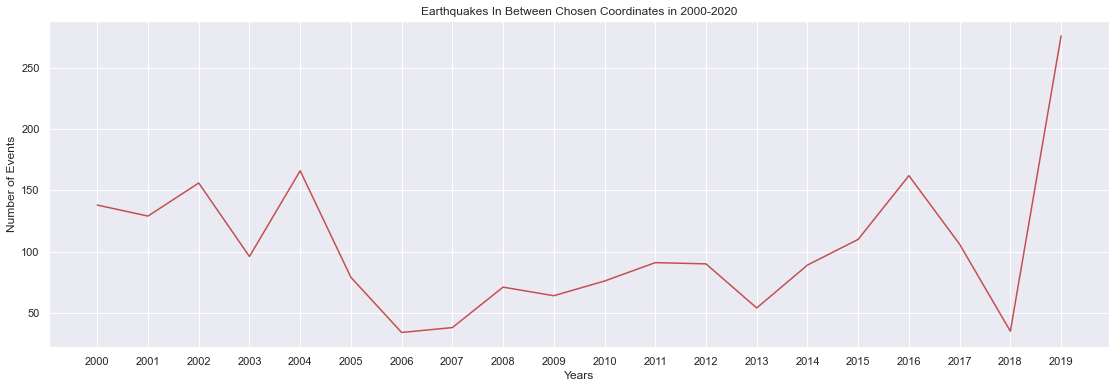

In [149]:
magn = distributionByCoordinate(41.6,40.73,28,29.8) #verify with istanbul

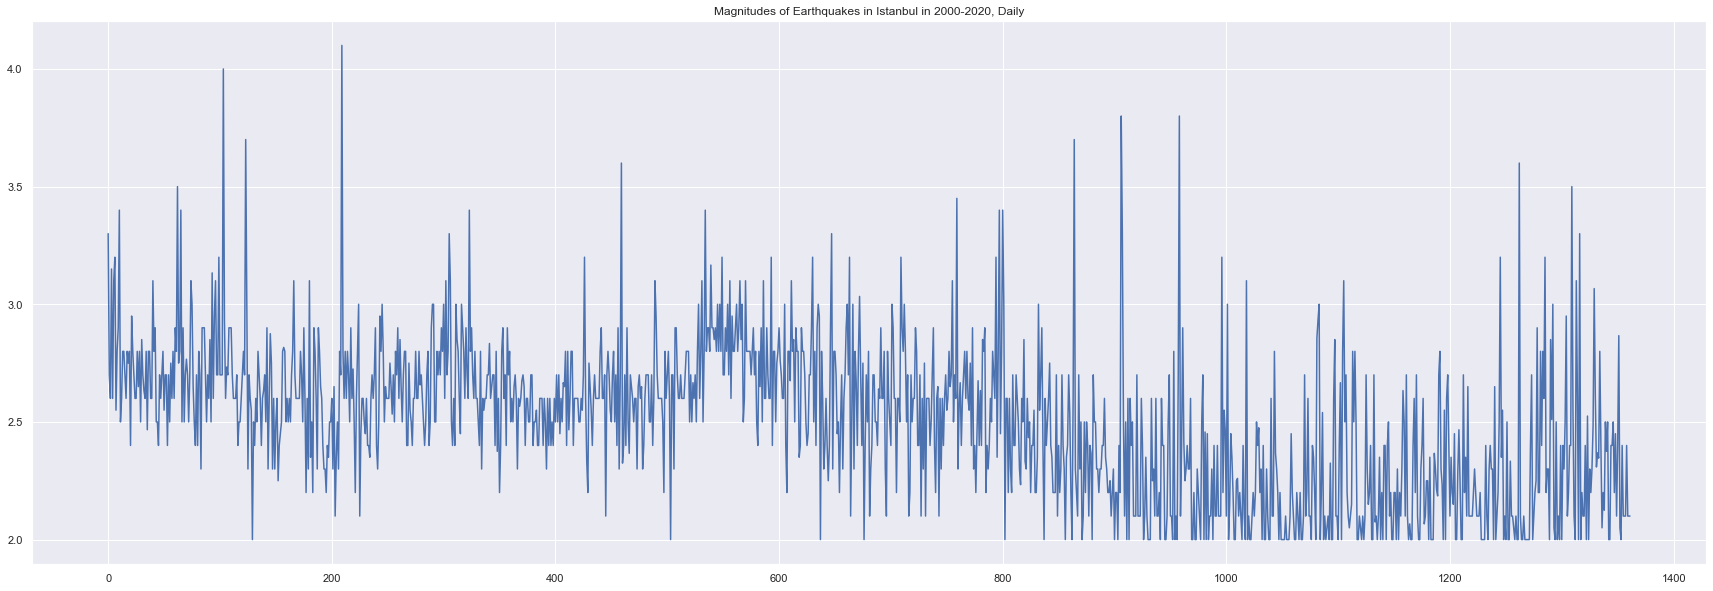

In [43]:
magn = magn.groupby("Date").xM.mean().values #daily average magnitude
plt.rc('figure',figsize=(30,10))
plt.title("Magnitudes of Earthquakes in Istanbul in 2000-2020, Daily")
plt.plot(magn)

In [44]:
#name of depth column has paranthesis and it is hard to deal with. I will update the name. Depth(KM) --> Depth
data.rename(columns={"Depth(KM)":'Depth'}, 
                 inplace=True)

# 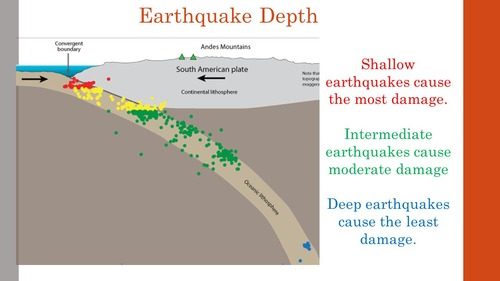

* Shallow earthquakes are between 0 and 70 km deep; 
* Intermediate earthquakes, 70 - 300 km deep; and 
* Deep earthquakes, 300 - 700 km deep. (1)

* Earthquakes in Turkey are mostly shallow earthquakes (2). But as the image suggest above, shallow earthquakes cause more damage.

*(1): https://www.usgs.gov/natural-hazards/earthquake-hazards/science/determining-depth-earthquake?qt-science_center_objects=0#qt-science_center_objects
*(2): https://deprem.sdu.edu.tr/tr/sismolojik-terimler/sismolojik-terimler-636s.html


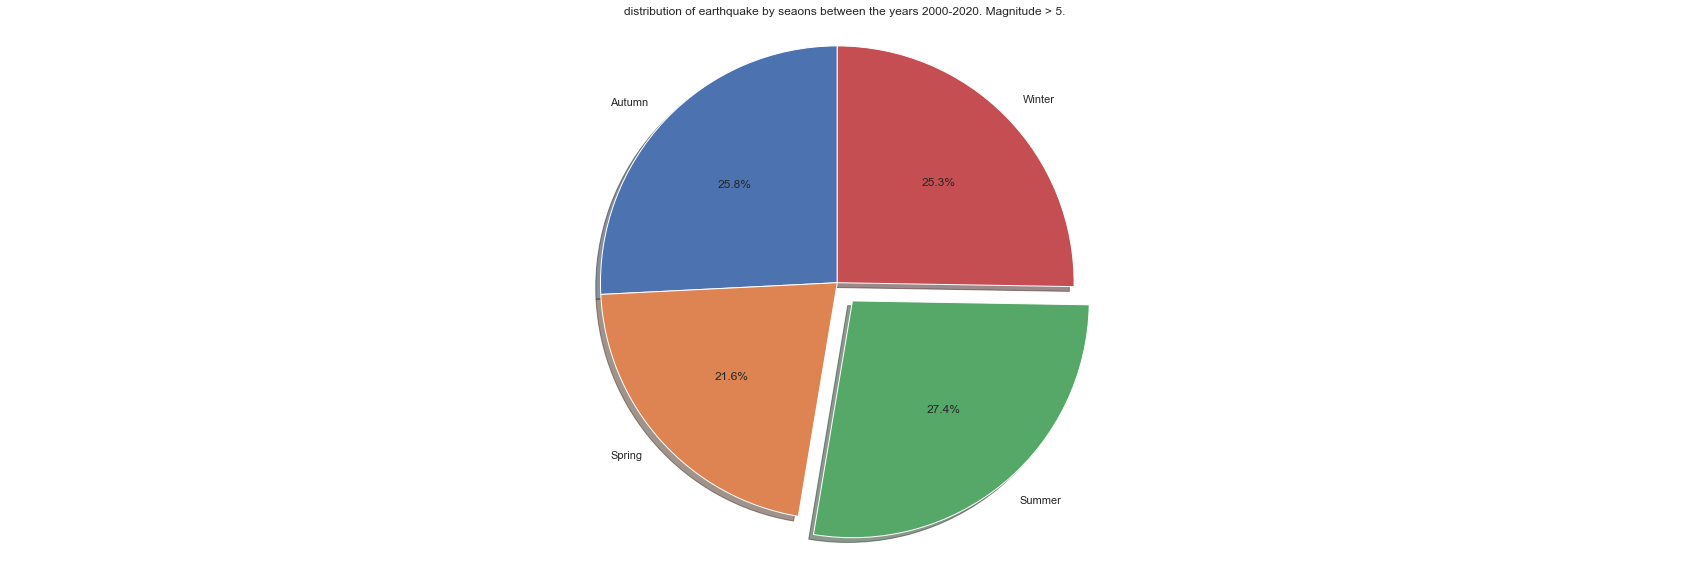

Conclusion is there is no specific 'earthquake season' 


In [45]:
#divide into 3 groups
shallow = data[data.Depth < 70]
intermediate = data[(data.Depth > 70) & (data.Depth < 300)]
deep = data[data.Depth > 300]
#there is no deep earthquake data in the table.
#len(deep)

fig1, ax1 = plt.subplots()
over = data[data.xM >= 5] 
season_dist_over = over.groupby("Season").ID.count()
ax1.pie(season_dist_over.values,explode=explode, labels=season_dist_over.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("distribution of earthquake by seaons between the years 2000-2020. Magnitude > 5.")
plt.show()

print("Conclusion is there is no specific 'earthquake season' ")

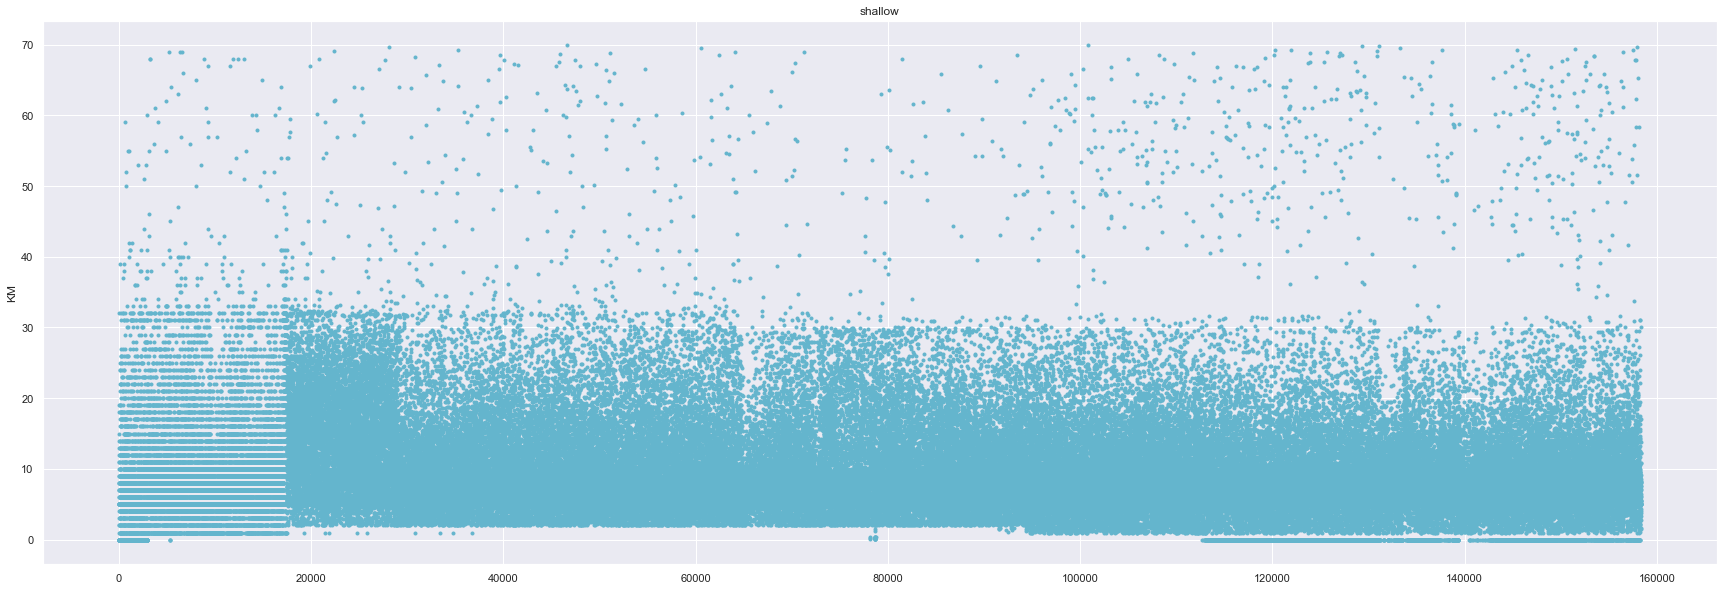

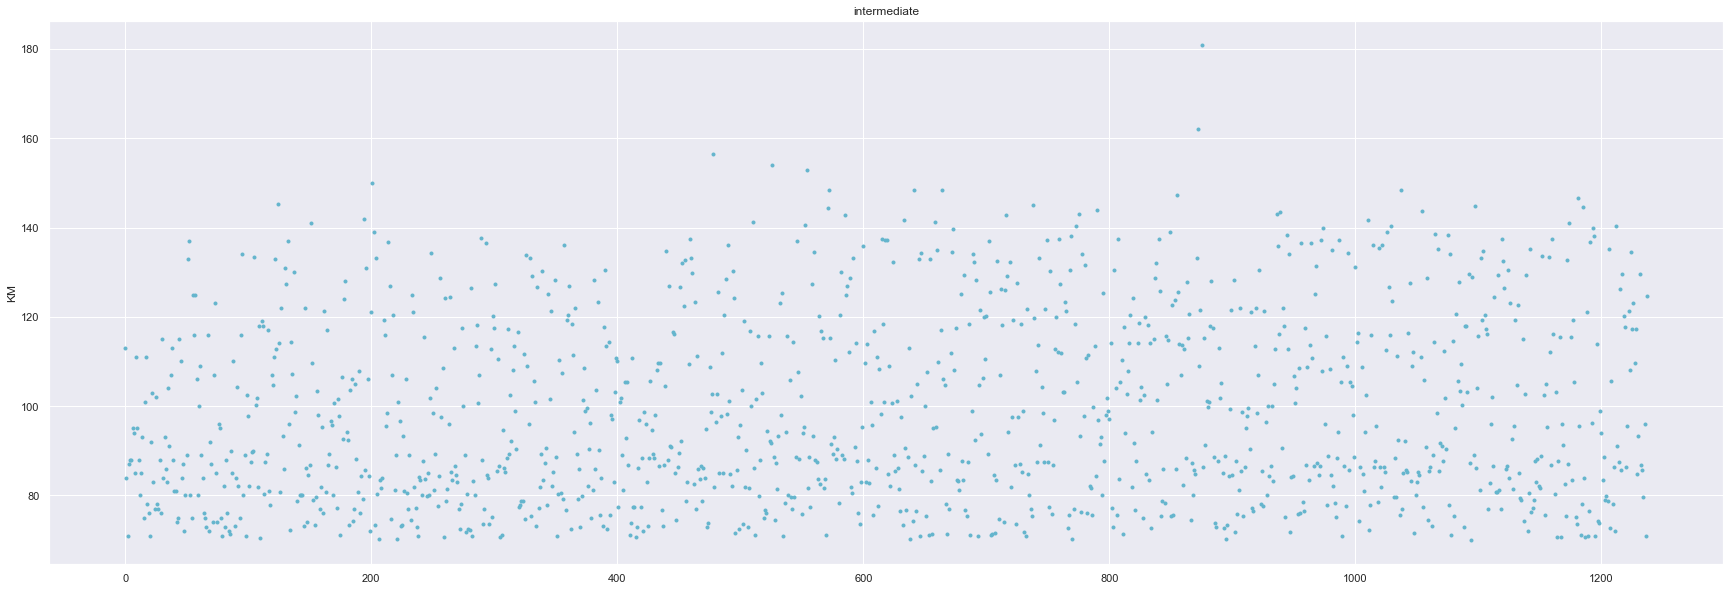

As seen above, intermediate is less frequent and range is about 70-180,
shallows are dense in the interval 0-30KM.


In [46]:
x=range(1,1001)
y1=shallow.Depth.values
y2=intermediate.Depth.values
 
# Basic stacked area chart.
plt.plot(range(len(y1)),y1,'c.')
plt.title("shallow")
plt.ylabel("KM")
plt.show()

plt.plot(range(len(y2)),y2,'c.')
plt.title("intermediate")
plt.ylabel("KM")
plt.show()
print('''As seen above, intermediate is less frequent and range is about 70-180,
shallows are dense in the interval 0-30KM.''')

Here is a pie chart to show shallow earthquake distribution over years.
Aegean region looks the most dangerous one, eastern anatolia and mediterranean follows that one. 
In fact, this chart is not any different from the one I made for all earthquakes shallow and intermediate combined.
The reason is as I stated before, earthquakes in Turkey are mostly shallow.


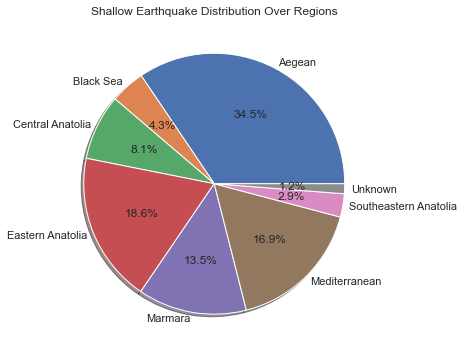

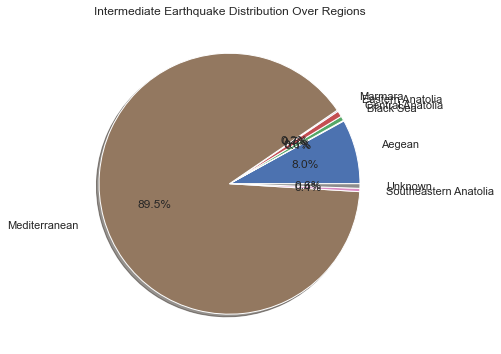

Although the chart one before was not surprising, this one here suggest something interesting.
According to this pie chart, most of the intermediate level earthquakes occurs in Mediterranean. The percentage is
surprisingly (for me at least) 89.5.
However, one small reminder is that indermediate earthquakes damage relatively less.


In [141]:
print('''Here is a pie chart to show shallow earthquake distribution over years.
Aegean region looks the most dangerous one, eastern anatolia and mediterranean follows that one. 
In fact, this chart is not any different from the one I made for all earthquakes shallow and intermediate combined.
The reason is as I stated before, earthquakes in Turkey are mostly shallow.''')
length = len(shallow)
d = shallow.groupby("Region").ID.count()
d_keys = d.keys()
sizes = d[d_keys] / length *100
labels = d_keys
fig1, ax1 = plt.subplots( figsize=(10, 6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
shadow=True, labeldistance=1.05)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title("Shallow Earthquake Distribution Over Regions")
ax1.set_title("Shallow Earthquake Distribution Over Regions")
plt.show()

length = len(intermediate)
d = intermediate.groupby("Region").ID.count()
d_keys = d.keys()
sizes = d[d_keys] / length *100
labels = d_keys
fig1, ax1 = plt.subplots( figsize=(10, 6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
shadow=True, labeldistance=1.2)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title("Intermediate Earthquake Distribution Over Regions")
ax1.set_title("Intermediate Earthquake Distribution Over Regions")
plt.show()
print('''Although the chart one before was not surprising, this one here suggest something interesting.
According to this pie chart, most of the intermediate level earthquakes occurs in Mediterranean. The percentage is
surprisingly (for me at least) 89.5.
However, one small reminder is that indermediate earthquakes damage relatively less.''')

One final analysis for depth. Here is MARMARA REGIONs data over the years. It suggest that in 2017, number of occasions
in Marmara increased significantly. We got to the conclusion before in fact. But what we do not know right now is
why is that so? In the following sections later, I will be seeing if there is a relation with climate or not.


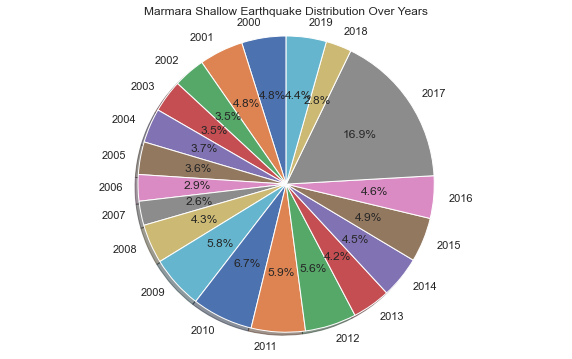

In [146]:
print('''One final analysis for depth. Here is MARMARA REGIONs data over the years. It suggest that in 2017, number of occasions
in Marmara increased significantly. We got to the conclusion before in fact. But what we do not know right now is
why is that so? In the following sections later, I will be seeing if there is a relation with climate or not.''')
length = len(shallow[(shallow.Region)== "Marmara"])
d = shallow[(shallow.Region) == "Marmara"].groupby("Year").ID.count()
d_keys = d.keys()
sizes = d[d_keys] / length *100
labels = d_keys
fig1, ax1 = plt.subplots( figsize=(10, 6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Marmara Shallow Earthquake Distribution Over Years")
plt.show()

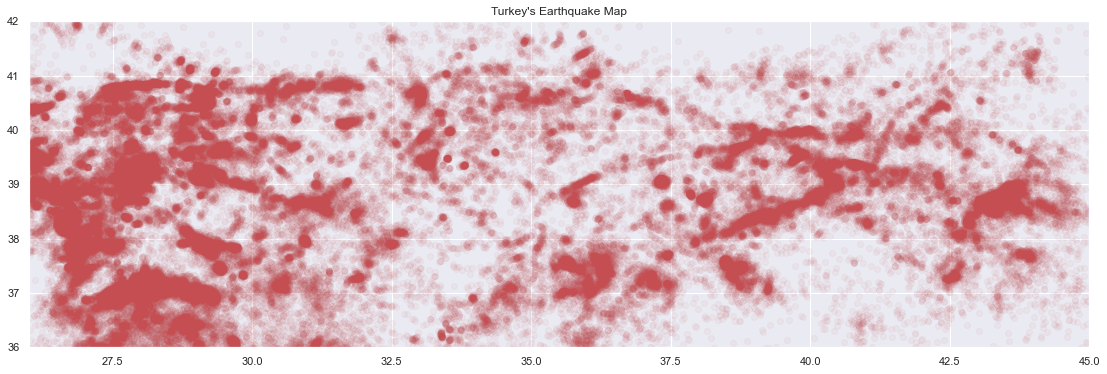

Aegean and Marmara Regions look dense in terms of fault line. Eastern Anatolia follows it. There is also a clustering
in Black Sea region, and central anatolia is almost empty.


In [49]:
#I will draw Turkey's fault line map.
#You can see that this map reflects the truth. 
# for a credibile source please check: https://www.hurriyetdailynews.com/turkey-updates-earthquake-map-after-21-years-124948
plt.rc('figure',figsize=(19,6))
plt.scatter(x=data.Longtitude.values, y=data.Latitude.values,alpha=0.05,color='r')
plt.axis([26,45,36,42])
plt.title("Turkey's Earthquake Map")
plt.show()
print('''Aegean and Marmara Regions look dense in terms of fault line. Eastern Anatolia follows it. There is also a clustering
in Black Sea region, and central anatolia is almost empty.''')

## Next I will observe data for climate for 2000-2020
* I am using NASA data. reference: https://power.larc.nasa.gov/data-access-viewer/
* This dataset I generated by using the website above has several parameters. It is coordinate based and shows 0.5 x 0.5 Degree Interannual Averages/Sums.
* This dataset contains an area in between 36-42N, 26-45E, which are Turkey's coordinates.
* The dataset represents 20 years. From 2000 to 2020.
* Parameters are as the following:
--
- T2M_MIN Minimum Temperature at 2 Meters (C) 
- T2M_MAX Maximum Temperature at 2 Meters (C)
- T2M Temperature at 2 Meters (C) 
- T2M_RANGE Temperature Range at 2 Meters (C) 
- T2MWET Wet Bulb Temperature at 2 Meters (C)
- RH2M Relative Humidity at 2 Meters (%) 
- PRECTOT Precipitation (mm day-1) 
- WS10M_MAX Maximum Wind Speed at 10 Meters (m/s) 
- WS10M_MIN Minimum Wind Speed at 10 Meters (m/s) 
- WS2M_MAX Maximum Wind Speed at 2 Meters (m/s) 
- WS2M_MIN Minimum Wind Speed at 2 Meters (m/s) 
- T2MDEW Dew/Frost Point at 2 Meters (C) 
- PS Surface Pressure (kPa)

In [50]:
nasa = pd.read_csv("nclimate.csv")
nasa

LAT    LON  PARAMETER  YEAR     JAN     FEB     MAR    APR    MAY  \
0      36.25  26.25    PRECTOT  2000   79.21   68.93   46.52  30.23  11.98   
1      36.25  26.25    PRECTOT  2001   94.13   78.42   21.80  53.99  17.01   
2      36.25  26.25    PRECTOT  2002   89.41   57.01   65.30  38.02   8.29   
3      36.25  26.25    PRECTOT  2003  118.30  151.48  104.76  64.64  21.64   
4      36.25  26.25    PRECTOT  2004  224.43   50.69   23.08  28.19  13.37   
...      ...    ...        ...   ...     ...     ...     ...    ...    ...   
25995  40.75  30.75  WS10M_MAX  2015    4.97    5.10    3.82   4.14   3.45   
25996  40.75  30.75  WS10M_MAX  2016    4.90    4.43    4.27   3.53   3.39   
25997  40.75  30.75  WS10M_MAX  2017    4.63    4.44    3.92   3.40   3.50   
25998  40.75  30.75  WS10M_MAX  2018    4.31    4.15    4.22   3.53   3.17   
25999  40.75  30.75  WS10M_MAX  2019    4.79    4.39    4.60   3.55   3.10   

        JUN   JUL   AUG    SEP    OCT     NOV     DEC     ANN  
0      1.07  0.00  0.55   5.14  41.51   64.83   55.75  405.73  
1      1.31  0.00  0.59   8.34  12.55  163.28  180.75  632.18  
2      4.21  3.52  5.02  56.30  45.75   88.06  196.22  657.09  
3      3.16  0.00  1.92   1.89  31.05   42.06  137.39  678.31  
4      3.19  0.01  0.92  16.00  10.59  123.43  110.52  604.42  
...     ...   ...   ...    ...    ...     ...     ...     ...  
25995  3.34  4.01  4.14   3.65   3.44    3.85    3.43    3.94  
25996  3.66  4.47  4.35   3.82   3.44    3.71    3.73    3.98  
25997  3.08  4.24  4.36   3.48   3.28    3.44    4.47    3.85  
25998  3.33  3.61  4.71   3.99   3.50    3.57    3.65    3.81  
25999  3.62  3.99  4.40   4.17   3.18    3.53    4.16    3.96  

[26000 rows x 17 columns]

In [51]:
#with this method I can easily filter the parameter I want, within the coordinates I want.
 #If no coordinate is given then it will return the result for all Turkey
    #method also can work without any paramater is given.
def param(parameter="",lat_top=42,lat_bottom=36,lon_left=26,lon_right=45):
    #return nasa[nasa.PARAMETER==parameter]
    if parameter:
        return nasa[(nasa.LAT <= lat_top) & (nasa.LAT >= lat_bottom) 
                        & (nasa.LON <= lon_right) & (nasa.LON >= lon_left) & (nasa.PARAMETER==parameter)]
    else:
        return nasa[(nasa.LAT <= lat_top) & (nasa.LAT >= lat_bottom) 
                        & (nasa.LON <= lon_right) & (nasa.LON >= lon_left)]

#for example if I want avg temp:

param("T2M")

LAT    LON PARAMETER  YEAR    JAN    FEB    MAR    APR    MAY    JUN  \
160    36.25  26.25       T2M  2000  12.10  13.28  14.11  16.65  19.63  22.01   
161    36.25  26.25       T2M  2001  15.00  14.36  16.55  16.83  19.22  22.37   
162    36.25  26.25       T2M  2002  13.28  15.52  15.56  16.45  19.11  22.63   
163    36.25  26.25       T2M  2003  15.52  11.71  13.45  15.51  19.72  22.90   
164    36.25  26.25       T2M  2004  13.23  13.61  14.74  16.46  18.51  22.27   
...      ...    ...       ...   ...    ...    ...    ...    ...    ...    ...   
25915  40.75  30.75       T2M  2015   1.86   3.44   6.32   8.41  15.86  17.66   
25916  40.75  30.75       T2M  2016   1.63   7.62   7.78  13.66  14.88  20.28   
25917  40.75  30.75       T2M  2017  -0.95   3.83   7.64  10.03  14.71  19.48   
25918  40.75  30.75       T2M  2018   3.64   6.08   9.37  14.16  17.16  20.37   
25919  40.75  30.75       T2M  2019   2.32   4.23   6.56  10.04  16.95  20.49   

         JUL    AUG    SEP    OCT    NOV    DEC    ANN  
160    24.10  24.55  23.38  20.13  19.16  16.09  18.78  
161    24.56  25.55  24.61  21.56  17.95  14.21  19.43  
162    25.18  26.24  24.38  21.56  19.19  15.02  19.53  
163    24.69  25.28  23.43  21.40  18.22  15.42  18.98  
164    24.08  24.86  22.88  21.80  18.52  16.15  18.94  
...      ...    ...    ...    ...    ...    ...    ...  
25915  21.06  22.44  21.29  14.03  10.15   3.51  12.22  
25916  21.64  22.52  18.20  13.05   8.24  -0.01  12.46  
25917  22.18  21.59  20.34  12.92   8.58   5.79  12.22  
25918  22.40  22.92  19.05  14.75   9.55   3.61  13.63  
25919  20.55  21.25  18.30  15.70  12.31   5.66  12.91  

[2000 rows x 17 columns]

In [52]:
#Since I drew number of earthquakes in 20 years for Istanbul, while observing the climate, I will try Istanbul first.
    #distributionByCoordinate(41.6,40.73,28,29.8) <--- these were the values I used before for istanbul.
min_temp_ist = param("T2M_MIN",41.6,40.73,28,29.8)
max_temp_ist = param("T2M_MAX",41.6,40.73,28,29.8)
avg_temp_ist = param("T2M",41.6,40.73,28,29.8)
prec_ist = param("PRECTOT",41.6,40.73,28,29.8)

humid_ist = param("RH2M",41.6,40.73,28,29.8)

In [53]:

years = np.arange(2000,2020,1)
mintemp=list()
maxtemp=list()
temp =list()
prec=list()
humid=list()
for y in years:
    mintemp.append(np.mean(min_temp_ist[min_temp_ist.YEAR==y].ANN))
    maxtemp.append(np.mean(max_temp_ist[max_temp_ist.YEAR==y].ANN))
    temp.append(np.mean(avg_temp_ist[avg_temp_ist.YEAR==y].ANN))
    prec.append(np.mean(prec_ist[prec_ist.YEAR==y].ANN))
    humid.append(np.mean(humid_ist[humid_ist.YEAR==y].ANN))

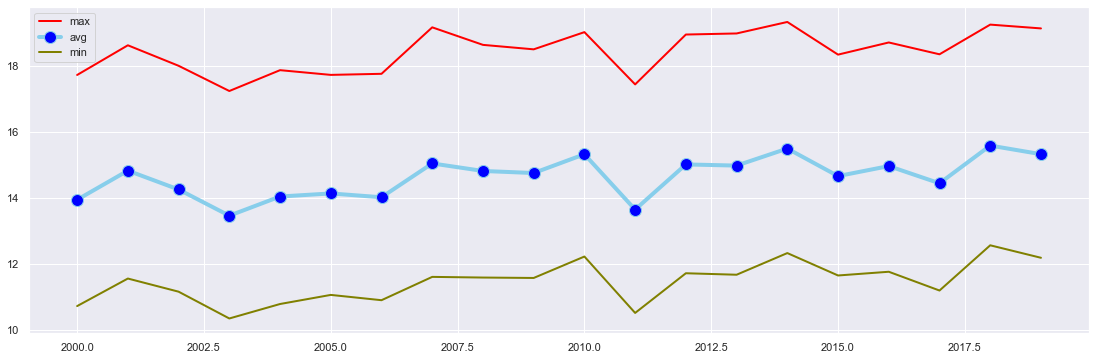

In [54]:
# multiple line plot for temperature values to observe the changes
    #ref: https://python-graph-gallery.com/122-multiple-lines-chart/
plt.plot( years, maxtemp,  marker='', color='red', linewidth=2, label="max")
plt.plot( years, temp, marker='o', markerfacecolor='blue',markersize=12, color='skyblue', linewidth=4,label="avg")
plt.plot( years, mintemp, marker='', color='olive', linewidth=2,label="min")
plt.legend()


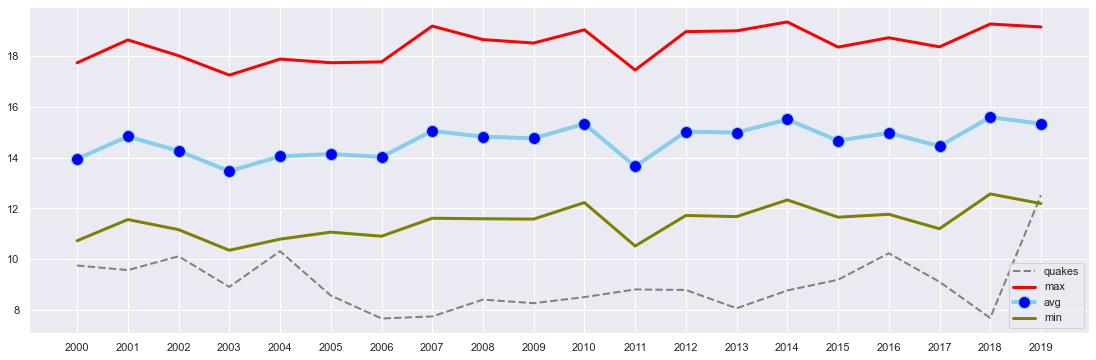

In [55]:
#now I will also add number of earthquakes in the same graph, to see if there is a pattern matched.
plt.plot(labels,istanbulbyyear/50+7,'grey',linestyle="dashed",label="quakes", linewidth=2) #divided by 50,added 7. see below.
plt.plot( labels, maxtemp,  marker='', color='red', linewidth=3, label="max")
plt.plot( labels, temp, marker='o', markerfacecolor='blue',markersize=12, color='skyblue', linewidth=4,label="avg")
plt.plot( labels, mintemp, marker='', color='olive', linewidth=3,label="min")
plt.legend()

#I divided number of earthquakes by 50 because its scale was too big to mach with temperature values. So I just resized it to
 #see the pattern. And as we see below in the graph, there seems no relation between temperature and earthquake. 

In [56]:
np.corrcoef(istanbulbyyear,maxtemp)

array([[ 1.       , -0.0455651],
       [-0.0455651,  1.       ]])

In [57]:
np.corrcoef(istanbulbyyear,prec)

array([[ 1.        , -0.18291241],
       [-0.18291241,  1.        ]])

Eventhough these two lines seem to have almost a similar pattern, I cant have the conclusion that there is actually
a correlation between number of earthquake and precipitation level. I will search more.


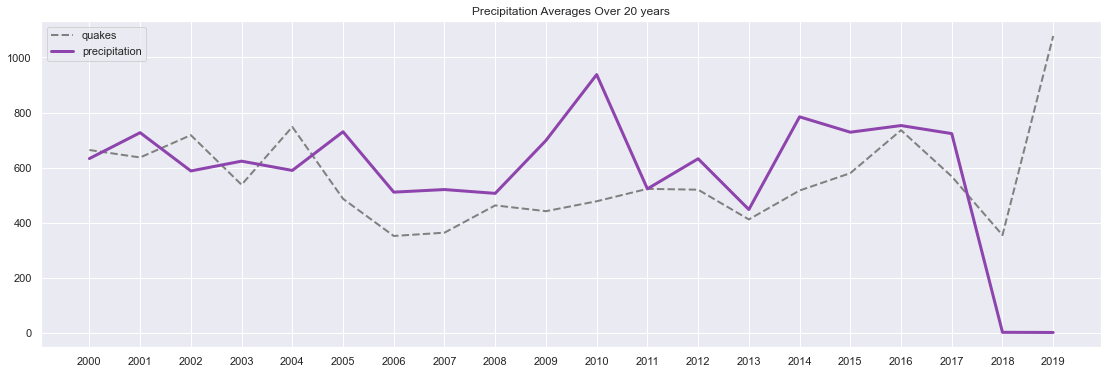

In [144]:
#let's do the same thing for precipitation
plt.plot(labels,istanbulbyyear*3+250,'grey',linestyle="dashed",label="quakes", linewidth=2)
plt.plot( labels, prec, color='#8E44AD', linewidth=3,label="precipitation")
plt.title("Precipitation Averages Over 20 years")
plt.legend()

print('''Eventhough these two lines seem to have almost a similar pattern, I cant have the conclusion that there is actually
a correlation between number of earthquake and precipitation level. I will search more.''' )

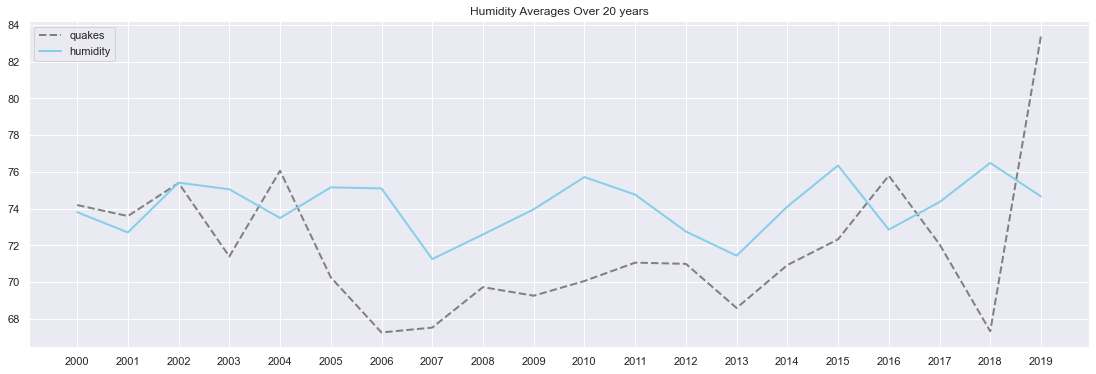

In [59]:
#humidity
plt.plot(labels,istanbulbyyear/15+65,'grey',linestyle="dashed",label="quakes", linewidth=2)
plt.plot( labels, humid, marker='', color='skyblue', linewidth=2,label="humidity")
plt.title("Humidity Averages Over 20 years")
plt.legend()

In [60]:
#The problem is Istanbul is quite small to come to a conclusion. Also it is a mistake to try to find anomaly with mean values.
    #these charts about weather so far only states the normal season values.
    #and these results match with official meteorology statistics. Here is the reference to check:
    #https://www.mgm.gov.tr/veridegerlendirme/il-ve-ilceler-istatistik.aspx?k=undefined&m=ISTANBUL and 
    #https://mgm.gov.tr/eng/forecast-cities.aspx?m=ISTANBUL*
#If you remember I drew a pie chart that represents shallows earthquakes in Marmara for 20 years and there was an anomaly in
#2017, percentage was much higher than usual

#### The problem is Istanbul is quite small to come to a conclusion. Also it is a mistake to try to find anomaly with mean values.
* These charts about weather so far only states the normal season values. Although these results match with offical meteorology statistics (pls. see the reference below), they are not answers to my question.
*reference: https://www.mgm.gov.tr/veridegerlendirme/il-ve-ilceler-istatistik.aspx?k=undefined&m=ISTANBUL, https://mgm.gov.tr/eng/forecast-cities.aspx?m=ISTANBUL*
* My real question "Is there any correlation between climate and earthquake?". For this purpose now I will make a deeper analysis. If you remember there was I pie chart I plotted that shows shallows earthquakes in Marmara for each year along 20 years. In that piechart there was an anomaly in 2017, percentage was much higher, in 2016 it is 4.16%, in 2017 16.9%, then in 2018 2.8%.
* So based on that chart, what I will do now is to check whether or not the weather condition has drastic changes. And I will do that not by annual values but with monthly ones.

In [61]:
min_temp_ist[min_temp_ist.YEAR==2015]

LAT    LON PARAMETER  YEAR   JAN   FEB   MAR   APR    MAY    JUN  \
24595  40.75  28.25   T2M_MIN  2015  4.47  4.71  6.09  8.36  15.20  18.35   
24855  40.75  28.75   T2M_MIN  2015  4.03  4.48  5.66  7.85  14.77  17.88   
25115  40.75  29.25   T2M_MIN  2015  2.75  3.52  4.61  6.64  13.72  16.72   
25375  40.75  29.75   T2M_MIN  2015  0.48  2.01  3.35  4.86  12.24  15.15   

         JUL    AUG    SEP    OCT    NOV   DEC    ANN  
24595  21.56  23.33  20.89  15.17  11.75  6.84  13.11  
24855  20.88  22.79  20.65  14.75  11.22  6.08  12.63  
25115  19.20  21.20  19.45  13.60   9.84  4.27  11.34  
25375  17.16  19.32  17.92  12.18   7.83  1.62   9.55

#### 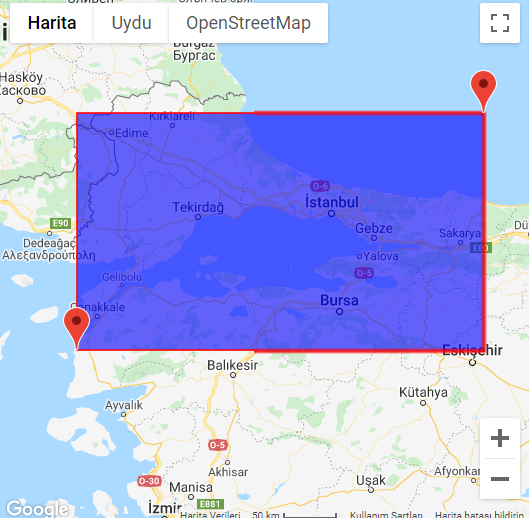
* I marked this area as Marmara roughly and these are the coordinates(lon,lat):
- 26.183264,39.866386
- 26.183264,41.835661
- 30.654699,41.835661
- 30.654699,39.866386

In [62]:
# I will observe Marmara region for years 2015-2019
min_temp_mar = param("T2M_MIN",41.83,39.86,26.18,30.65)
max_temp_mar = param("T2M_MAX",41.83,39.86,26.18,30.65)
avg_temp_mar = param("T2M",41.83,39.86,26.18,30.65)
prec_mar = param("PRECTOT",41.83,39.86,26.18,30.65)
humid_mar = param("RH2M",41.83,39.86,26.18,30.65)



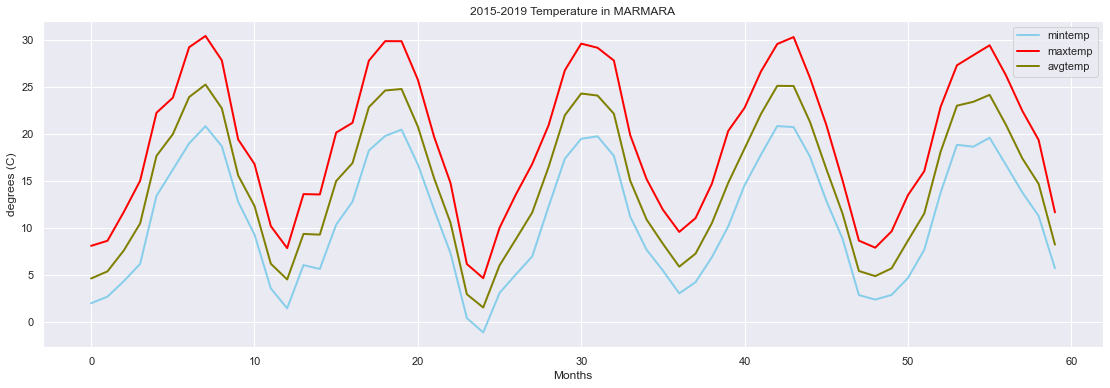

year 2017 is in between momth 24-36, but there is no change.


In [63]:
y1=min_temp_mar[min_temp_mar["YEAR"]==2015][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y2=min_temp_mar[min_temp_mar["YEAR"]==2016][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y3=min_temp_mar[min_temp_mar["YEAR"]==2017][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y4=min_temp_mar[min_temp_mar["YEAR"]==2018][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y5=min_temp_mar[min_temp_mar["YEAR"]==2019][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
yx = np.concatenate((y1,y2,y3,y4,y5))
plt.plot(yx, marker='', color='skyblue', linewidth=2,label="mintemp")
plt.legend()

y1=max_temp_mar[max_temp_mar["YEAR"]==2015][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y2=max_temp_mar[max_temp_mar["YEAR"]==2016][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y3=max_temp_mar[max_temp_mar["YEAR"]==2017][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y4=max_temp_mar[max_temp_mar["YEAR"]==2018][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y5=max_temp_mar[max_temp_mar["YEAR"]==2019][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
yx = np.concatenate((y1,y2,y3,y4,y5))
plt.plot(yx, marker='', color='red', linewidth=2,label="maxtemp") 
plt.legend()

y1=avg_temp_mar[avg_temp_mar["YEAR"]==2015][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y2=avg_temp_mar[avg_temp_mar["YEAR"]==2016][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y3=avg_temp_mar[avg_temp_mar["YEAR"]==2017][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y4=avg_temp_mar[avg_temp_mar["YEAR"]==2018][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y5=avg_temp_mar[avg_temp_mar["YEAR"]==2019][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
yx = np.concatenate((y1,y2,y3,y4,y5))
plt.plot(yx, marker='', color='olive', linewidth=2,label="avgtemp") 
plt.legend()

plt.title("2015-2019 Temperature in MARMARA")
plt.xlabel("Months")
plt.ylabel("degrees (C)")
plt.show()
print("year 2017 is in between momth 24-36, but there is no change.")

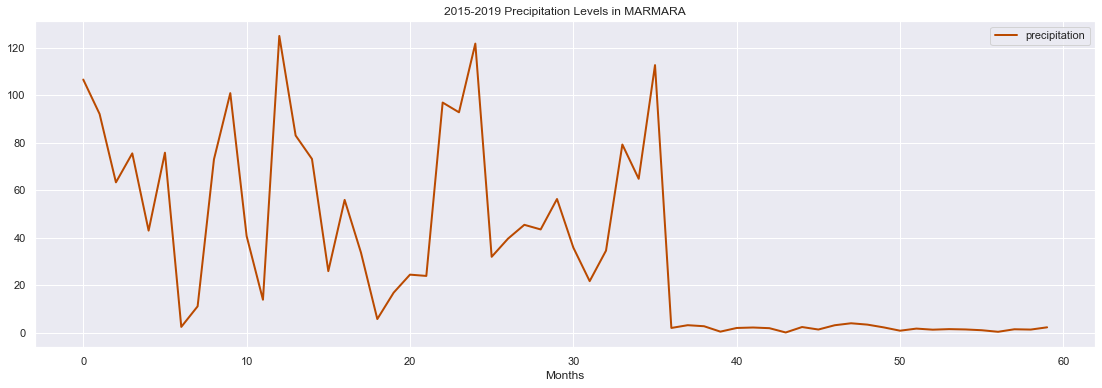

In [64]:
y1=prec_mar[prec_mar["YEAR"]==2015][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y2=prec_mar[prec_mar["YEAR"]==2016][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y3=prec_mar[prec_mar["YEAR"]==2017][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y4=prec_mar[prec_mar["YEAR"]==2018][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y5=prec_mar[prec_mar["YEAR"]==2019][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
yx = np.concatenate((y1,y2,y3,y4,y5))
plt.plot(yx, marker='', color='#BA4A00', linewidth=2,label="precipitation")
plt.legend()
plt.title("2015-2019 Precipitation Levels in MARMARA")
plt.xlabel("Months")
plt.ylabel("")
plt.show()

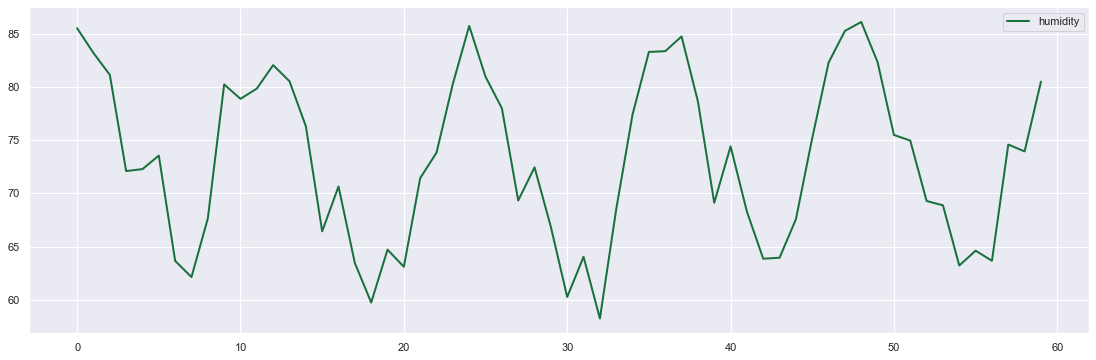

In [65]:
y1=humid_mar[humid_mar["YEAR"]==2015][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y2=humid_mar[humid_mar["YEAR"]==2016][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y3=humid_mar[humid_mar["YEAR"]==2017][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y4=humid_mar[humid_mar["YEAR"]==2018][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y5=humid_mar[humid_mar["YEAR"]==2019][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
yx = np.concatenate((y1,y2,y3,y4,y5))
plt.plot(yx, marker='', color='#196F3D', linewidth=2,label="humidity")
plt.legend()

##### Conclusion so far: There seems to be no relation between weather and earthquake at least in Marmara whatsoever. Neither weather triggers earthquake nor the other way around. Although it is a known scientific truth that earthquakes might have effects on weather, I could not find any trace of it in my research. Maybe earthquakes are not big enough in Turkey.

*In this article of Columbia University you can see that earthquake 'can' change the weather pattern in the short-term: https://blogs.ei.columbia.edu/2011/04/28/can-big-earthquakes-disrupt-world-weather/
But in Turkey, they do not.

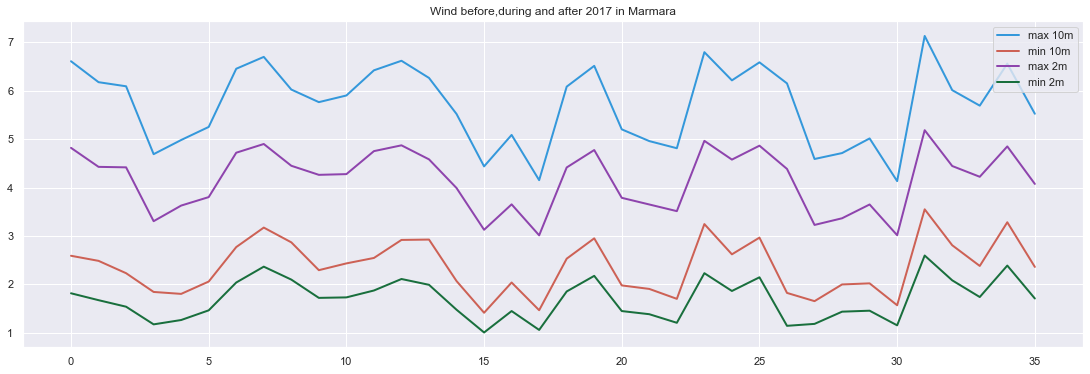

2017 is between 12-24


In [66]:
#Finally I am observing wind.
wind_mar = param("WS10M_MAX",41.6,40.73,28,29.8)
wind_min_mar = param("WS10M_MIN",41.6,40.73,28,29.8)
wind_mar2=param("WS2M_MAX",41.6,40.73,28,29.8)
wind_min_mar2=param("WS2M_MIN",41.6,40.73,28,29.8)

y2=wind_mar[wind_mar["YEAR"]==2016][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y3=wind_mar[wind_mar["YEAR"]==2017][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y4=wind_mar[wind_mar["YEAR"]==2018][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
yx = np.concatenate((y2,y3,y4))
plt.plot(yx, marker='', color='#3498DB', linewidth=2,label="max 10m")
plt.legend()

y2=wind_min_mar[wind_min_mar["YEAR"]==2016][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y3=wind_min_mar[wind_min_mar["YEAR"]==2017][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y4=wind_min_mar[wind_min_mar["YEAR"]==2018][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
yx = np.concatenate((y2,y3,y4))
plt.plot(yx, marker='', color='#CD6155', linewidth=2,label="min 10m")
plt.legend()

y2=wind_mar2[wind_mar2["YEAR"]==2016][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y3=wind_mar2[wind_mar2["YEAR"]==2017][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y4=wind_mar2[wind_mar2["YEAR"]==2018][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
yx = np.concatenate((y2,y3,y4))
plt.plot(yx, marker='', color='#8E44AD', linewidth=2,label="max 2m")
plt.legend()

y2=wind_min_mar2[wind_min_mar2["YEAR"]==2016][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y3=wind_min_mar2[wind_min_mar2["YEAR"]==2017][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
y4=wind_min_mar2[wind_min_mar2["YEAR"]==2018][["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].mean().values
yx = np.concatenate((y2,y3,y4))
plt.plot(yx, marker='', color='#196F3D', linewidth=2,label="min 2m")
plt.legend()

plt.title("Wind before,during and after 2017 in Marmara")
plt.show()
print('''2017 is between 12-24''')

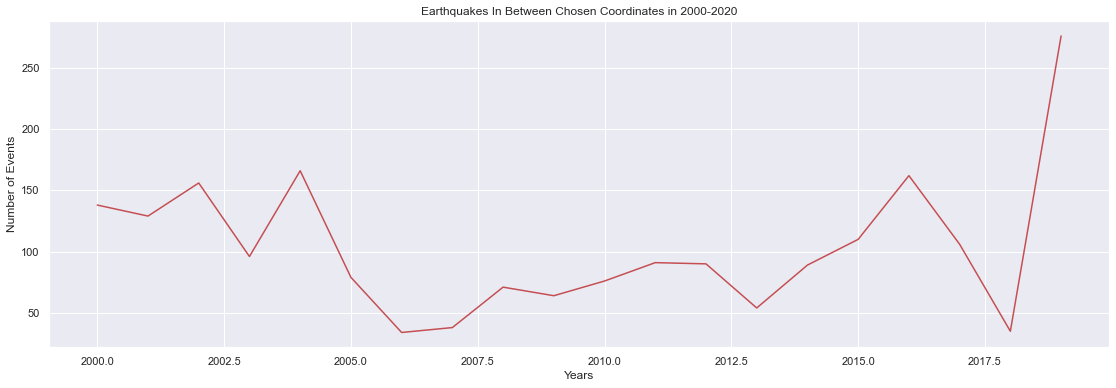

In [67]:
X = distributionByCoordinate(41.6,40.73,28,29.8) #this is Istanbul data
#X.insert(4,"Month", X["Date"].str[5:7], True)
#X.drop("Month",axis=1)

In [68]:
mag = X.groupby(["Year","Month"]).xM.mean().values #monthly average magnitude
num = X.groupby(["Year","Month"]).ID.count().values #monthly number of earthquake

This method does not work because my data is too big and it causes runtimewarning, overflow.


C:\Users\nilay\miniconda3\envs\datamining\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-69-a4f53e310edc>:34: RuntimeWarning: invalid value encountered in subtract
  m,b = v - learning_rate*grad


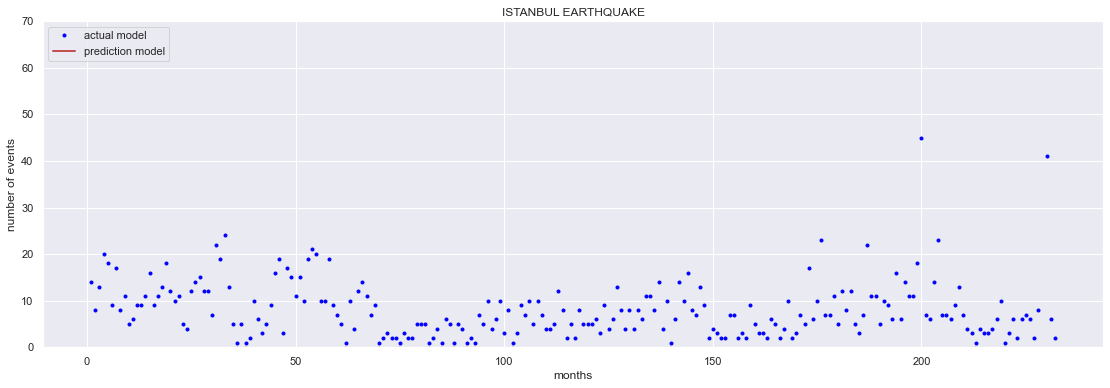

In [69]:
#trying to do earthquake prediction.
print('''This method does not work because my data is too big and it causes runtimewarning, overflow.''')
# Start with random values for slope and intercept.
m,b = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
v = (m,b)
#print("m0,b0-starting point", v)

def linear_gradient(x, t, m, b):
    
    predicted = m * x + b               # The prediction of the model.
    error = (predicted-t)              # error is (predicted - actual)
    #squared_error = error ** 2           # We'll minimize squared error
   # print("Error:",np.mean(squared_error))
    grad = np.array([2 * error * x, 2 * error])    # using its gradient.  # 2(mx+b).-x, 2(mx+b)
    return grad


#initial prediction
#def predict(m,x_day,b):
#  return m*x_day+b
times=np.arange(1,233,1)
pred = m*num+b
plt.plot(times,num,'.', linewidth=2,color="blue",label="actual model")
plt.plot(times,pred,'-',color="r",linewidth=2,label="prediction model")

#ITERATE AND FIND THE M,B VALUES WHICH MINIMIZE THE ERROR pred-mx_days*+b
learning_rate = 0.01
for epoch in range(1000):
    # Compute the mean of the gradients
    grad = np.mean(linear_gradient(times, num, m,b),axis=1)
    # Take a step in that direction
    #print( "v:",v, "grad:",grad)
    v = (m,b)
    m,b = v - learning_rate*grad
    #print(epoch, v)


# plot the prediction
x_future = 1+np.arange(times.shape[0]+2)
p_future = m*x_future+b
#print(p_future)
plt.plot(x_future,p_future,'g-*')
plt.plot(x_future[-2:],p_future[-2:],'bs', markersize=16, alpha=0.3)
plt.legend()
plt.ylim([0,70])
plt.ylabel('number of events')
plt.xlabel('months')
plt.title('ISTANBUL EARTHQUAKE')
plt.show()

In [70]:
num #2019 September average is 190.
#the reason is 2019 September Silivri Earthquake. Magnitude is 5.8.

array([ 14,   8,  13,  20,  18,   9,  17,   8,  11,   5,   6,   9,   9,
        11,  16,   9,  11,  13,  18,  12,  10,  11,   5,   4,  12,  14,
        15,  12,  12,   7,  22,  19,  24,  13,   5,   1,   5,   1,   2,
        10,   6,   3,   5,   9,  16,  19,   3,  17,  15,  11,  15,  10,
        19,  21,  20,  10,  10,  19,   9,   7,   5,   1,  10,   4,  12,
        14,  11,   7,   9,   1,   2,   3,   2,   2,   1,   3,   2,   2,
         5,   5,   5,   1,   2,   4,   1,   6,   5,   1,   5,   4,   1,
         2,   1,   7,   5,  10,   4,   6,  10,   3,   8,   1,   3,   9,
         7,  10,   5,  10,   7,   4,   4,   5,  12,   8,   2,   5,   2,
         8,   5,   5,   5,   6,   3,   9,   4,   6,  13,   8,   4,   8,
         4,   8,   6,  11,  11,   8,  14,   4,  10,   1,   6,  14,  10,
        16,   8,   7,  13,   9,   2,   4,   3,   2,   2,   7,   7,   2,
         3,   2,   9,   5,   3,   3,   2,   6,   5,   2,   4,  10,   2,
         3,   7,   5,  17,   6,  10,  23,   7,   7,  11,   5,  1

In [71]:
#I will try making prediction with PolynomialFeatures
X=np.arange(1,233,1).reshape(-1,1)
y=num

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=12, include_bias=False)
#X_poly = poly_features.fit_transform(X)
#X[0]
#print("Original", X[0],"Polynomial", X_poly[0])

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
#lin_reg.intercept_, lin_reg.coef_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
X_test = np.linspace(0,232, 1000)
X_test = X_test[:,np.newaxis]

X_test_poly = poly_features.fit_transform(X_test)
y_test = lin_reg.predict(X_test)

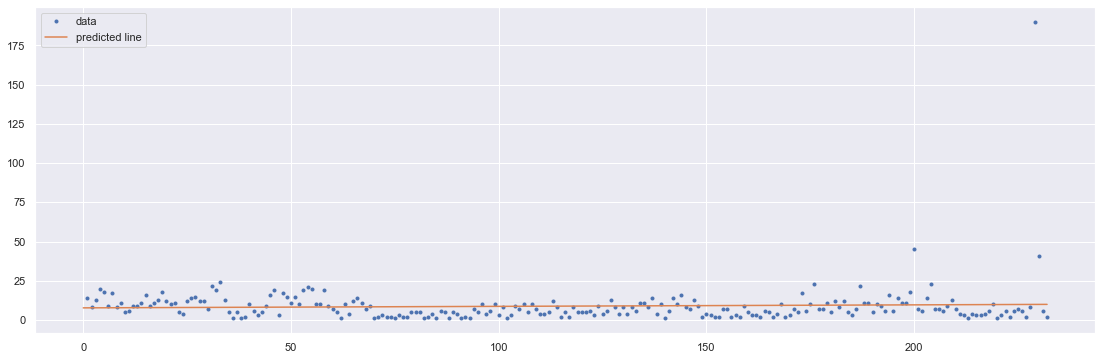

In [75]:
plt.plot(X, y,'.')
plt.plot(X_test, y_test)
plt.legend(['data', 'predicted line'])
plt.show()

In [158]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(4),LinearRegression())

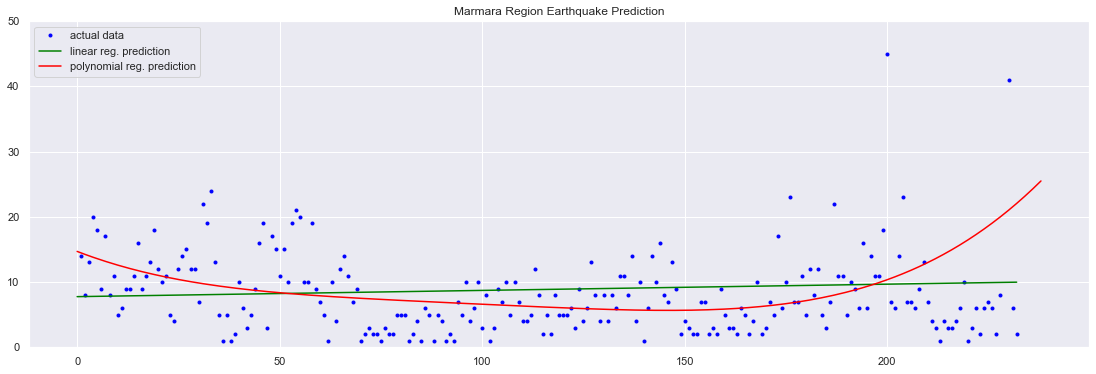

In [159]:
X_test = np.linspace(0,232, 1000)
X_test = X_test[:,np.newaxis]

y_test = lin_reg.predict(X_test)
plt.plot(X,y,'.',label="actual data",color="blue")
plt.plot(X_test, y_test,  color='green',label="linear reg. prediction")

poly_model.fit(X,y)
x_test = np.linspace(0,238,238).reshape(-1,1)
y_test = poly_model.predict(x_test)

plt.title("Marmara Region Earthquake Prediction")
plt.plot(x_test,y_test, color='red',label="polynomial reg. prediction")
plt.ylim([0,50])
plt.legend()
plt.show()

In [162]:
y_test[233:]

array([23.14322245, 23.71233763, 24.29455226, 24.89005693, 25.49904362])

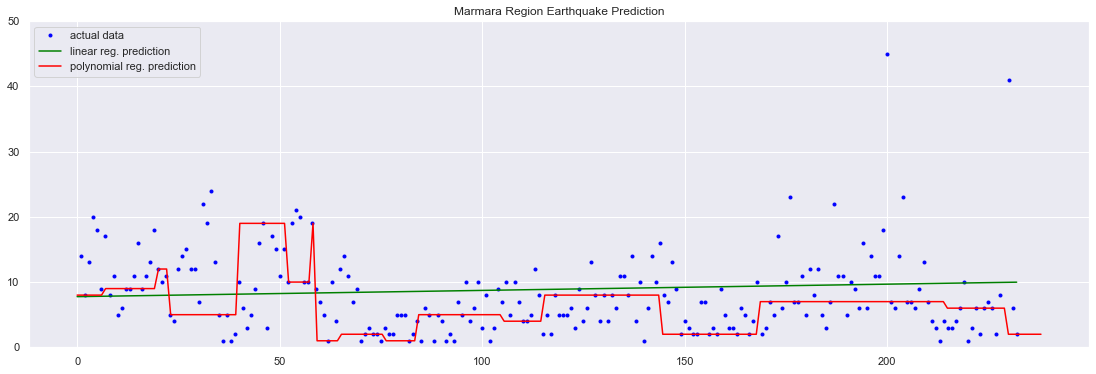

In [119]:
X_test = np.linspace(0,232, 1000)
X_test = X_test[:,np.newaxis]

y_test = lin_reg.predict(X_test)
plt.plot(X,y,'.',label="actual data",color="blue")
plt.plot(X_test, y_test,  color='green',label="linear reg. prediction")

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
polynomial_svm_clf = Pipeline([
        #("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(C=100,  kernel = "poly", degree=5, coef0=0.5, random_state=42, gamma = 'auto'))
    ])

polynomial_svm_clf.fit(X, y)
x_test = np.linspace(0,238,238).reshape(-1,1)
y_test = polynomial_svm_clf.predict(x_test)

plt.title("Marmara Region Earthquake Prediction")
plt.plot(x_test,y_test, color='red',label="polynomial reg. prediction")
plt.ylim([0,50])
plt.legend()
plt.show()

In [79]:
print('''The data I am analyzing ends in 2019.12.31. So, my prediction is about first months of 2020.
These following numbers suggest average daily quakes on a monthly basis in Istanbul, from Jan to May. Normally values are 
in a range from 0 to 25, less frequently from 25 to 50. I can tell that 2019 Silivri Earthquake effects these results
negatively, the result is biased. Unfortunately this is not a successful prediction.''')
y_test[232:-1]

The data I am analyzing ends in 2019.12.31. So, my prediction is about first months of 2020.
These following numbers suggest average daily quakes on a monthly basis in Istanbul, from Jan to May. Normally values are 
in a range from 0 to 25, less frequently from 25 to 50. I can tell that 2019 Silivri Earthquake effects these results
negatively, the result is biased. Unfortunately this is not a successful prediction.


array([6, 6, 6, 6, 6], dtype=int64)

In [80]:
print('''For 2019 September Silivri Earthquake experts say there was no such an earthquake in 20 years. And this graph above
verifies that say.
you can read more from here: https://www.trtworld.com/perspectives/in-pictures-a-5-8-magnitude-earthquake-jolts-turkey-s-istanbul-30160
''')

For 2019 September Silivri Earthquake experts say there was no such an earthquake in 20 years. And this graph above
verifies that say.
you can read more from here: https://www.trtworld.com/perspectives/in-pictures-a-5-8-magnitude-earthquake-jolts-turkey-s-istanbul-30160



In [81]:
#winter 1, spring 2, summer 3, autumn 4
data.Season.replace("Autumn",4,inplace=True)

In [84]:
tlist=list()
tlist.append(humid_mar.groupby("YEAR").JAN.mean().values)
tlist.append(humid_mar.groupby("YEAR").FEB.mean().values)
tlist.append(humid_mar.groupby("YEAR").MAR.mean().values)
tlist.append(humid_mar.groupby("YEAR").APR.mean().values)
tlist.append(humid_mar.groupby("YEAR").MAY.mean().values)
tlist.append(humid_mar.groupby("YEAR").JUN.mean().values)
tlist.append(humid_mar.groupby("YEAR").JUL.mean().values)
tlist.append(humid_mar.groupby("YEAR").AUG.mean().values)
tlist.append(humid_mar.groupby("YEAR").SEP.mean().values)
tlist.append(humid_mar.groupby("YEAR").OCT.mean().values)
tlist.append(humid_mar.groupby("YEAR").NOV.mean().values)
tlist.append(humid_mar.groupby("YEAR").DEC.mean().values)
tlist = np.array(tlist).reshape(-1,)

In [85]:
xmlist = data[data.Region == "Marmara"].groupby(["Year","Month"]).xM.mean().values 
len(xmlist)

240

In [86]:
xmlist = data.groupby(["Year","Month"]).xM.mean().values 

In [87]:
#corr for min temp-magnitude in marmara
np.corrcoef(xmlist,tlist)

array([[1.        , 0.17484122],
       [0.17484122, 1.        ]])

In [88]:
#corr for max temp-magnitude marmara
np.corrcoef(xmlist,tlist)

array([[1.        , 0.17484122],
       [0.17484122, 1.        ]])

In [89]:
#corr for precipitation-magnitude marmara
np.corrcoef(xmlist,tlist)

array([[1.        , 0.17484122],
       [0.17484122, 1.        ]])

In [90]:
#corr for humidity-magnitude marmara
np.corrcoef(xmlist,tlist)

array([[1.        , 0.17484122],
       [0.17484122, 1.        ]])

In [91]:
min_temp_turkey = param("T2M_MIN")
max_temp_turkey = param("T2M_MAX")
avg_temp_turkey = param("T2M")
prec_turkey = param("PRECTOT")
humid_turkey = param("RH2M")
wind_speed_turkey=param("WS10M_MAX")
surface_pressure_turkey=param("PS")

In [92]:
allturkeylist = data.groupby(["Year","Month"]).xM.mean().values 

In [93]:
turlist=list()
turlist.append(humid_turkey.groupby("YEAR").JAN.mean().values)
turlist.append(humid_turkey.groupby("YEAR").FEB.mean().values)
turlist.append(humid_turkey.groupby("YEAR").MAR.mean().values)
turlist.append(humid_turkey.groupby("YEAR").APR.mean().values)
turlist.append(humid_turkey.groupby("YEAR").MAY.mean().values)
turlist.append(humid_turkey.groupby("YEAR").JUN.mean().values)
turlist.append(humid_turkey.groupby("YEAR").JUL.mean().values)
turlist.append(humid_turkey.groupby("YEAR").AUG.mean().values)
turlist.append(humid_turkey.groupby("YEAR").SEP.mean().values)
turlist.append(humid_turkey.groupby("YEAR").OCT.mean().values)
turlist.append(humid_turkey.groupby("YEAR").NOV.mean().values)
turlist.append(humid_turkey.groupby("YEAR").DEC.mean().values)
turlist = np.array(turlist).reshape(-1,)

In [94]:
#corr for min temp-magnitude turkey
np.corrcoef(allturkeylist,turlist)

array([[1.        , 0.30991516],
       [0.30991516, 1.        ]])

In [95]:
#corr for max temp-magnitude turkey
np.corrcoef(allturkeylist,turlist)

array([[1.        , 0.30991516],
       [0.30991516, 1.        ]])

In [96]:
#corr for avg temp-magnitude turkey
np.corrcoef(allturkeylist,turlist)

array([[1.        , 0.30991516],
       [0.30991516, 1.        ]])

In [97]:
#corr for prec-magnitude turkey
np.corrcoef(allturkeylist,turlist)

array([[1.        , 0.30991516],
       [0.30991516, 1.        ]])

In [98]:
#corr for humid-magnitude turkey
np.corrcoef(allturkeylist,turlist)

array([[1.        , 0.30991516],
       [0.30991516, 1.        ]])

In [99]:
depthturkey = data.groupby(["Year","Month"]).Depth.mean().values

In [100]:
depthcorr=list()
depthcorr.append(surface_pressure_turkey.groupby("YEAR").JAN.mean().values)
depthcorr.append(surface_pressure_turkey.groupby("YEAR").FEB.mean().values)
depthcorr.append(surface_pressure_turkey.groupby("YEAR").MAR.mean().values)
depthcorr.append(surface_pressure_turkey.groupby("YEAR").APR.mean().values)
depthcorr.append(surface_pressure_turkey.groupby("YEAR").MAY.mean().values)
depthcorr.append(surface_pressure_turkey.groupby("YEAR").JUN.mean().values)
depthcorr.append(surface_pressure_turkey.groupby("YEAR").JUL.mean().values)
depthcorr.append(surface_pressure_turkey.groupby("YEAR").AUG.mean().values)
depthcorr.append(surface_pressure_turkey.groupby("YEAR").SEP.mean().values)
depthcorr.append(surface_pressure_turkey.groupby("YEAR").OCT.mean().values)
depthcorr.append(surface_pressure_turkey.groupby("YEAR").NOV.mean().values)
depthcorr.append(surface_pressure_turkey.groupby("YEAR").DEC.mean().values)
depthcorr = np.array(depthcorr).reshape(-1,)

In [101]:
#corr for min temp-magnitude turkey
np.corrcoef(depthturkey,depthcorr)

array([[ 1.        , -0.16688682],
       [-0.16688682,  1.        ]])

In [102]:
#corr for max temp-depth turkey
np.corrcoef(depthturkey,depthcorr)

array([[ 1.        , -0.16688682],
       [-0.16688682,  1.        ]])

In [103]:
#corr for avg temp-depth turkey
np.corrcoef(depthturkey,depthcorr)

array([[ 1.        , -0.16688682],
       [-0.16688682,  1.        ]])

In [104]:
#corr for prec-depth turkey
np.corrcoef(depthturkey,depthcorr)

array([[ 1.        , -0.16688682],
       [-0.16688682,  1.        ]])

In [105]:
#corr for humid-depth turkey
np.corrcoef(depthturkey,depthcorr)

array([[ 1.        , -0.16688682],
       [-0.16688682,  1.        ]])

In [106]:
#corr for windspeed-depth turkey
np.corrcoef(depthturkey,depthcorr)

array([[ 1.        , -0.16688682],
       [-0.16688682,  1.        ]])

In [107]:
#corr for windspeed-magnitde turkey
np.corrcoef(allturkeylist,depthcorr)

array([[ 1.        , -0.21972724],
       [-0.21972724,  1.        ]])

In [108]:
#corr for surface pressure-magnitde turkey
np.corrcoef(allturkeylist,depthcorr)

array([[ 1.        , -0.21972724],
       [-0.21972724,  1.        ]])

In [109]:
#corr for surface pressure-depth turkey
np.corrcoef(depthturkey,depthcorr)

array([[ 1.        , -0.16688682],
       [-0.16688682,  1.        ]])